In [ ]:
# Install required packages
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn torch plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Using device: cpu
=== Enhanced Commodity Market Risk Analysis ===
Tickers: ['CL=F', 'GC=F', 'NG=F']
Date range: 2020-01-01 to 2024-01-01
Prediction horizons: [5, 10, 20] days
Anomaly threshold: 95 percentile
Analysis window: 60 days
Fetching data...
Fetching data for CL=F...
- Got 1006 days of data for CL=F
Fetching data for GC=F...
- Got 1006 days of data for GC=F
Fetching data for NG=F...
- Got 1007 days of data for NG=F

Analyzing CL=F...
- Generated 27 features for CL=F
- Training models for 5-day horizon...
  - Train size: 677, Test size: 125
  - Training LSTM...


Epoch 10/100, Train Loss: 0.0015, Test Loss: 0.0025
Early stopping at epoch 19
  - LSTM metrics: MAE=4.53, RMSE=5.59, MAPE=5.59%
  - Training Transformer...
Epoch 10/100, Train Loss: 0.0063, Test Loss: 0.0030
Epoch 20/100, Train Loss: 0.0045, Test Loss: 0.0020
Epoch 30/100, Train Loss: 0.0037, Test Loss: 0.0014
Early stopping at epoch 31
  - Transformer metrics: MAE=3.45, RMSE=4.41, MAPE=4.23%
- Training models for 10-day horizon...
  - Train size: 673, Test size: 124
  - Training LSTM...
Epoch 10/100, Train Loss: 0.0025, Test Loss: 0.0051
Epoch 20/100, Train Loss: 0.0020, Test Loss: 0.0051
Early stopping at epoch 28
  - LSTM metrics: MAE=6.41, RMSE=8.05, MAPE=7.81%
  - Training Transformer...
Epoch 10/100, Train Loss: 0.0048, Test Loss: 0.0029
Epoch 20/100, Train Loss: 0.0049, Test Loss: 0.0049
Epoch 30/100, Train Loss: 0.0056, Test Loss: 0.0039
Early stopping at epoch 31
  - Transformer metrics: MAE=5.02, RMSE=6.20, MAPE=6.16%
- Training models for 20-day horizon...
  - Train size: 6

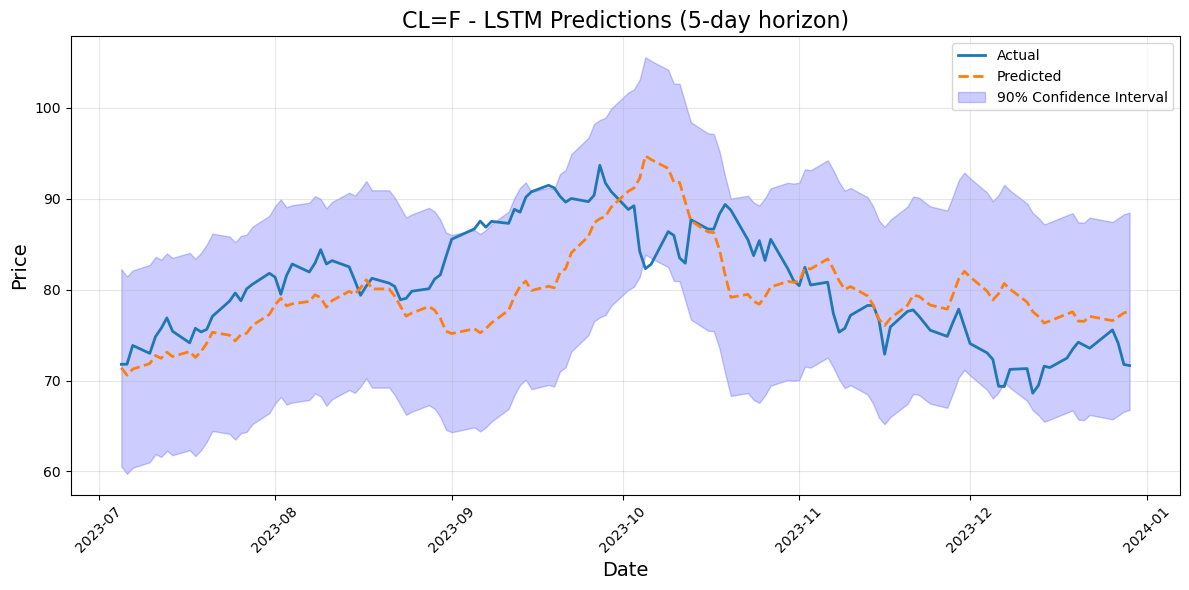

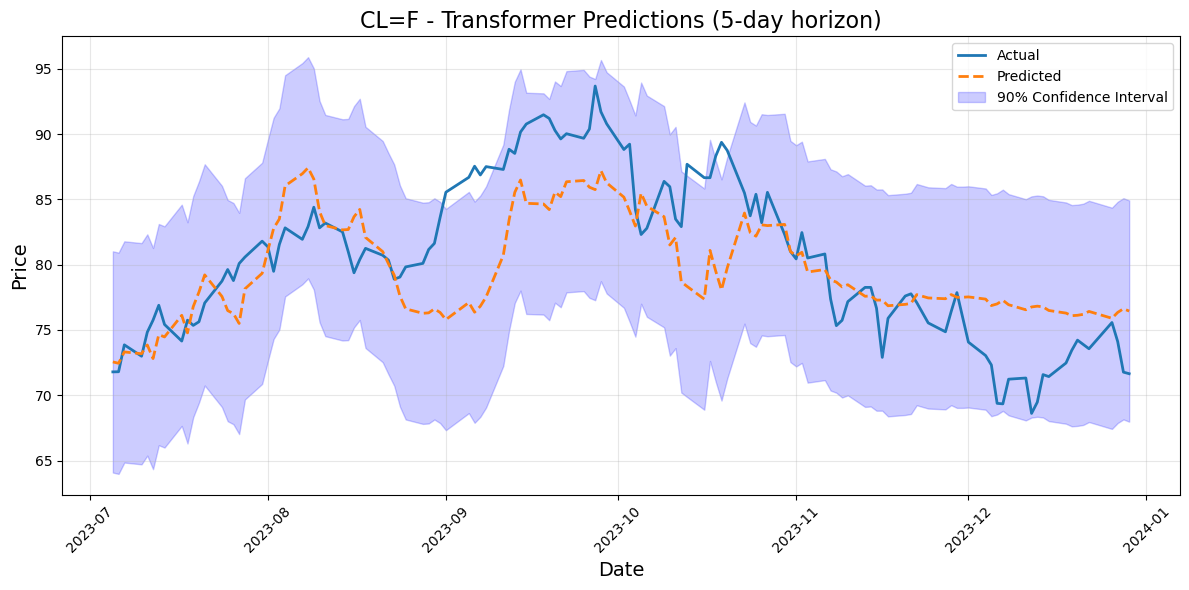


CL=F Supply Chain Risk: Level Medium (Score 58.24/100)
Risk trend: Decreasing
Recent anomalies: 0

Visualizing results for GC=F...


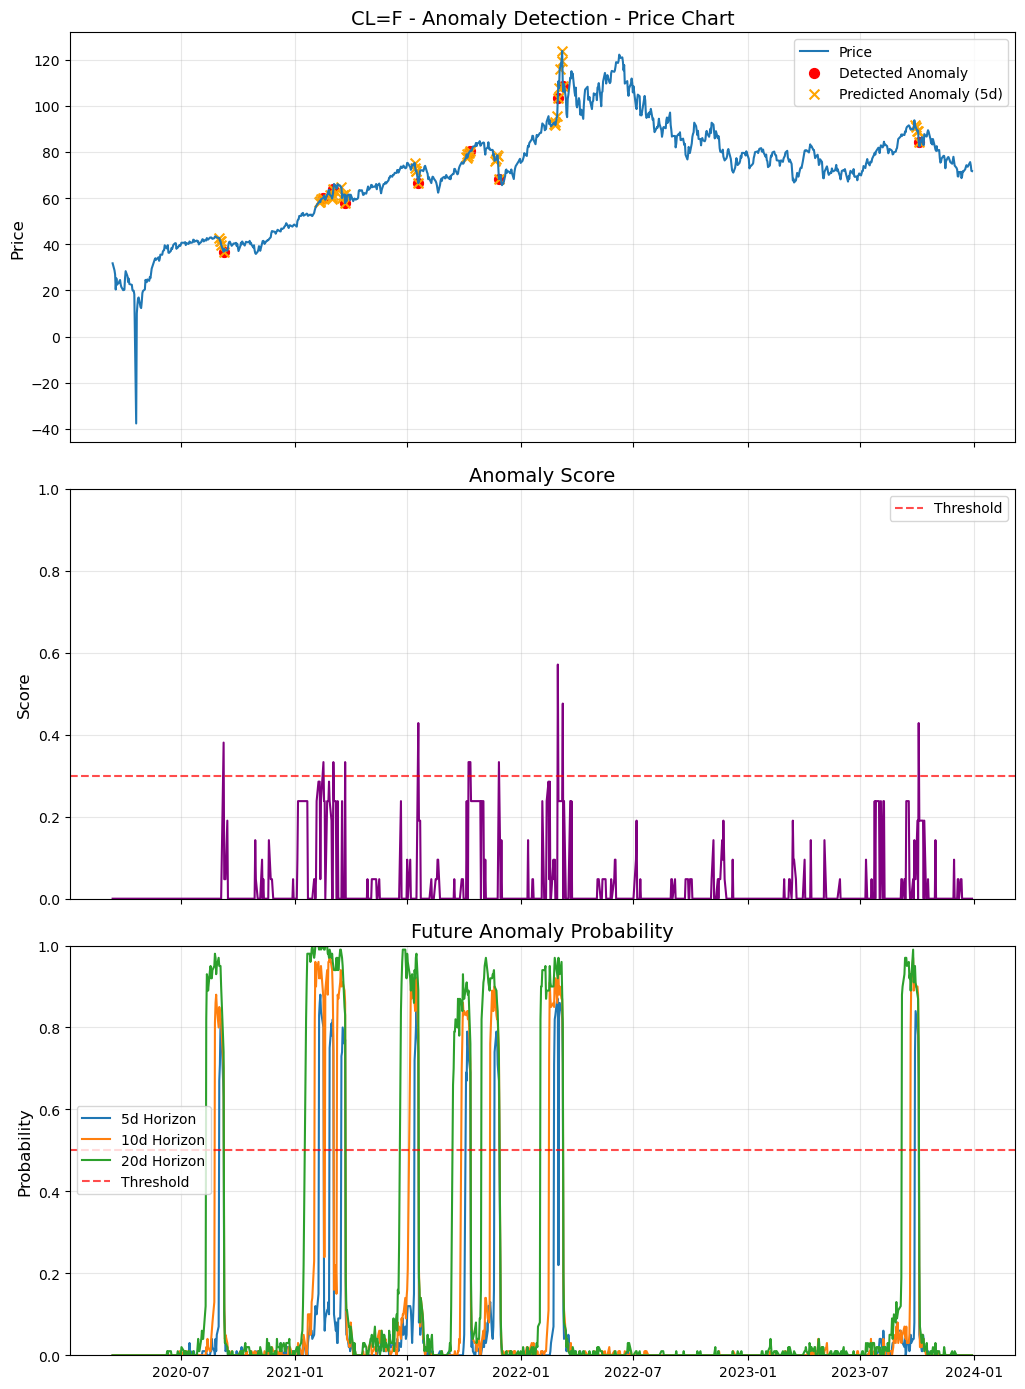

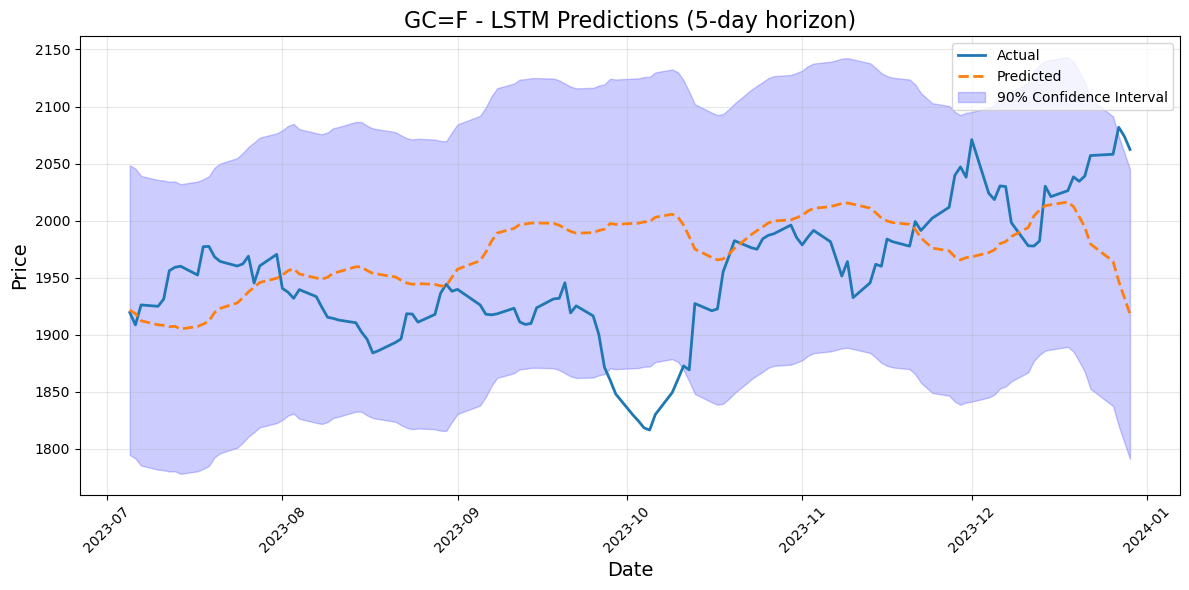

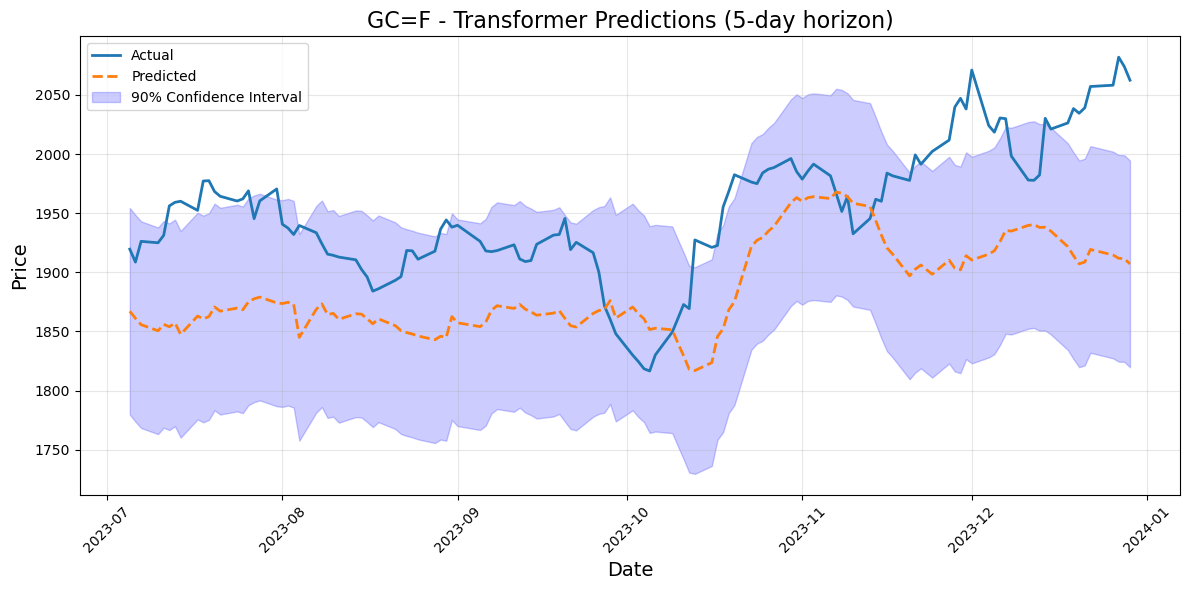


GC=F Supply Chain Risk: Level Low (Score 32.27/100)
Risk trend: Stable
Recent anomalies: 1

Visualizing results for NG=F...


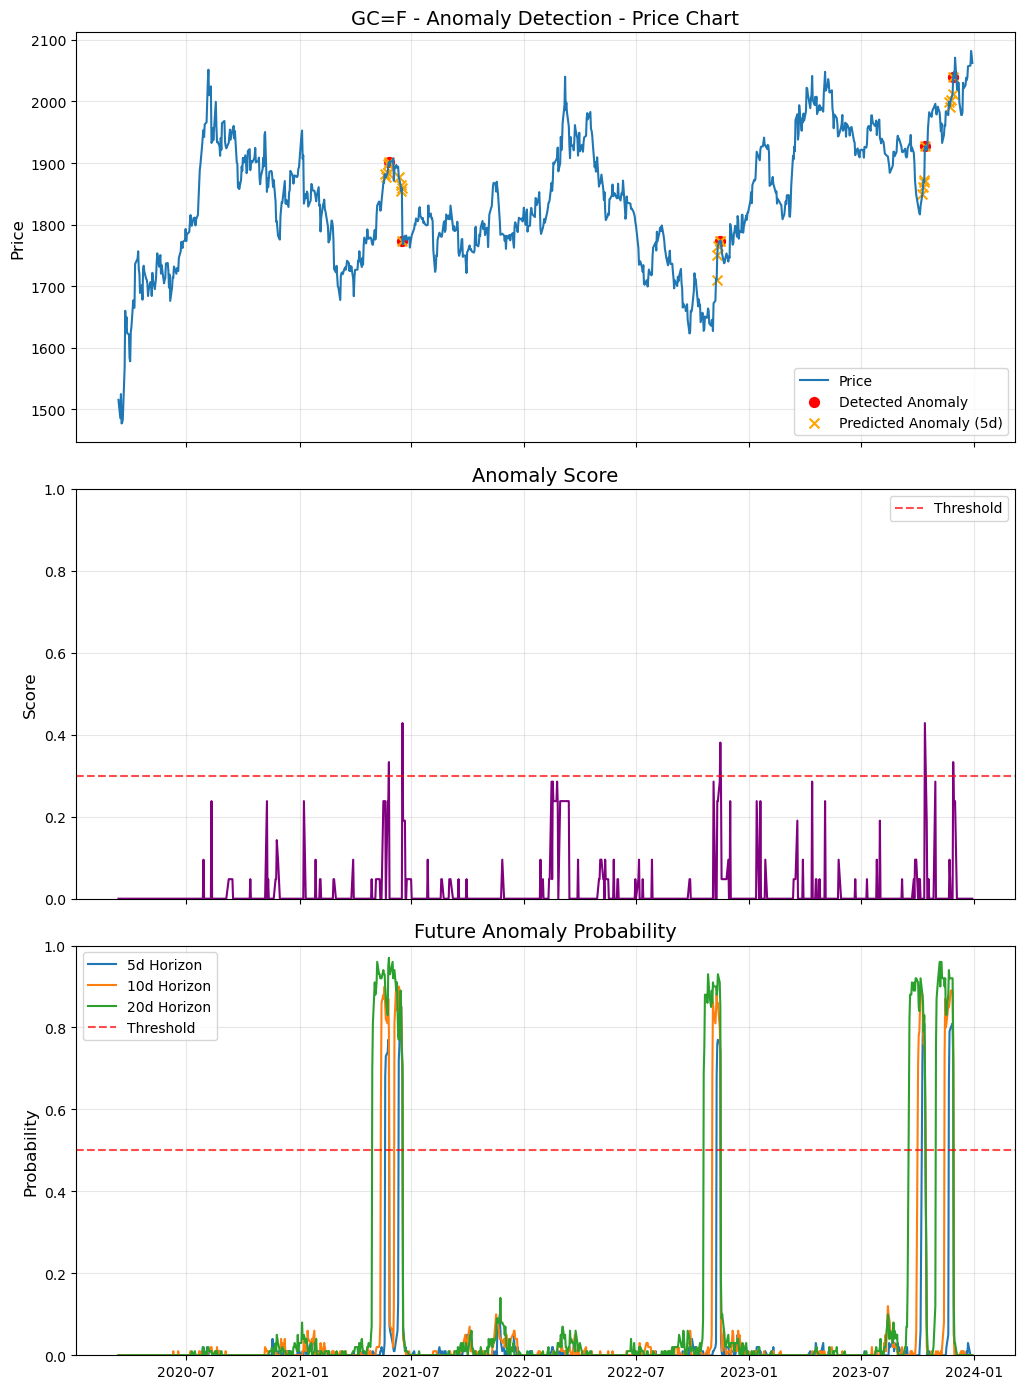

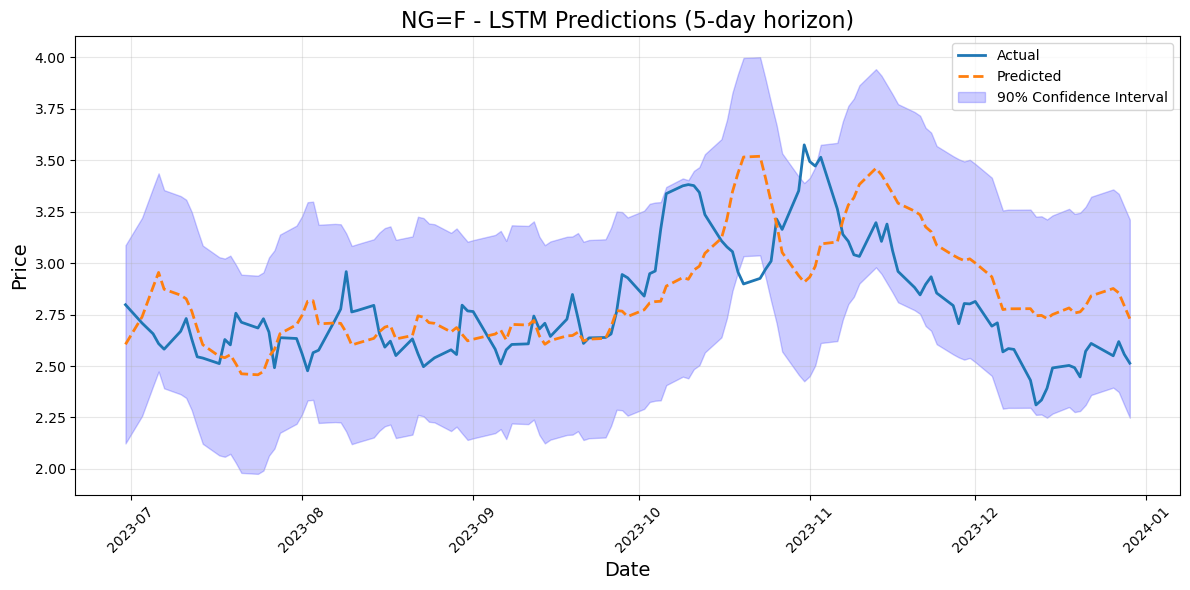

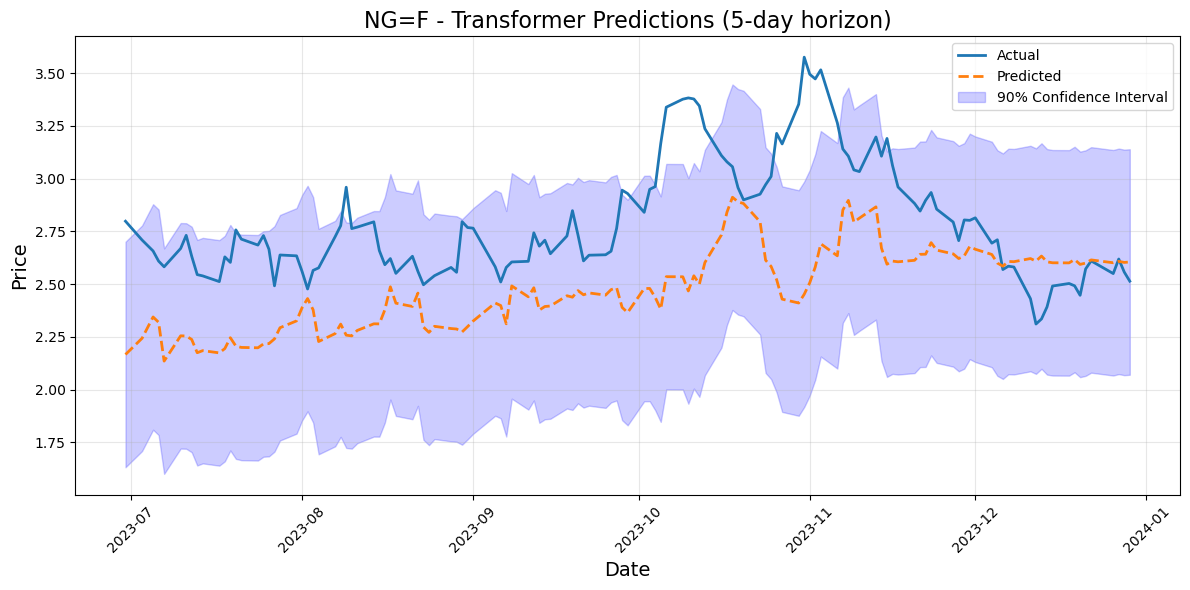


NG=F Supply Chain Risk: Level Medium (Score 50.65/100)
Risk trend: Decreasing
Recent anomalies: 0


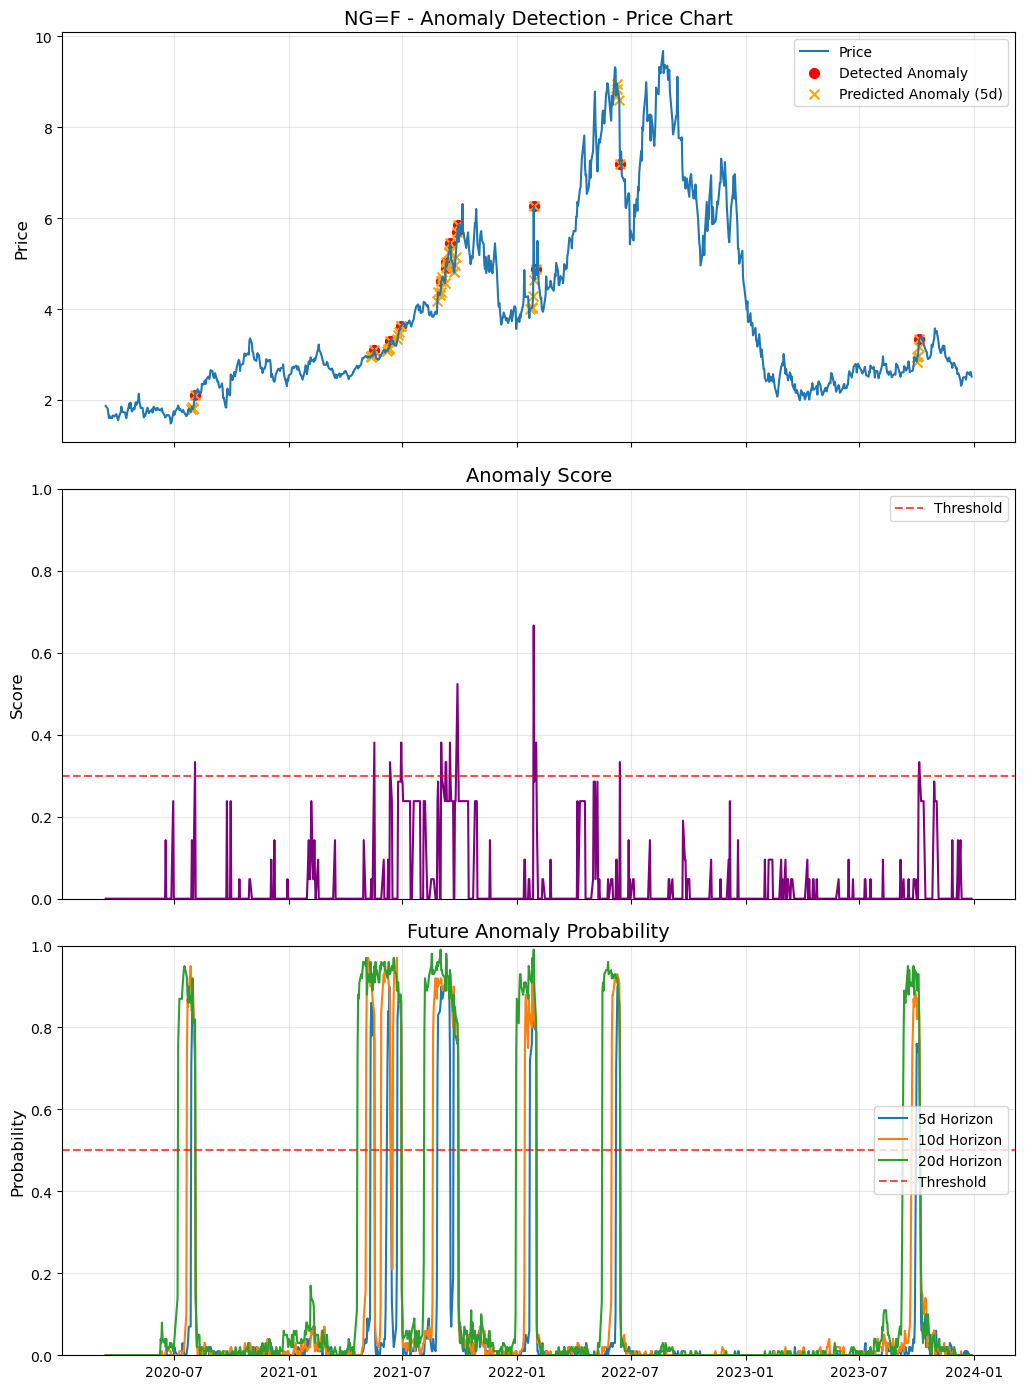

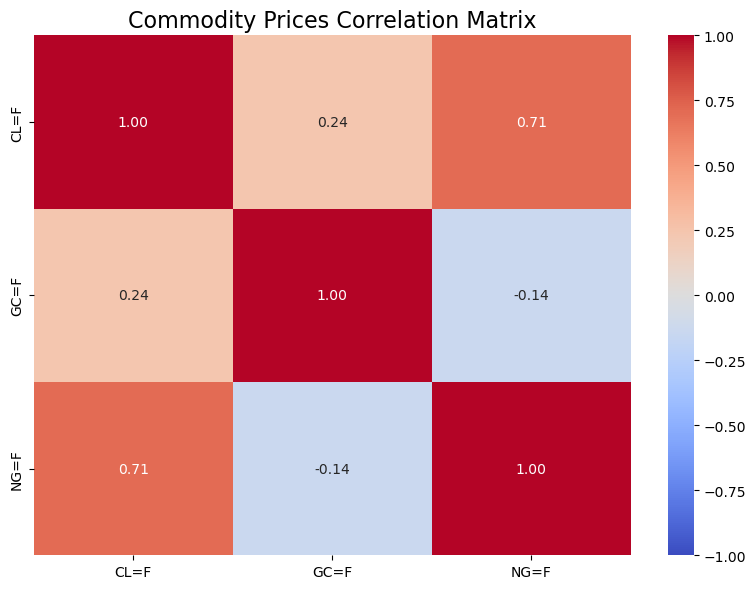

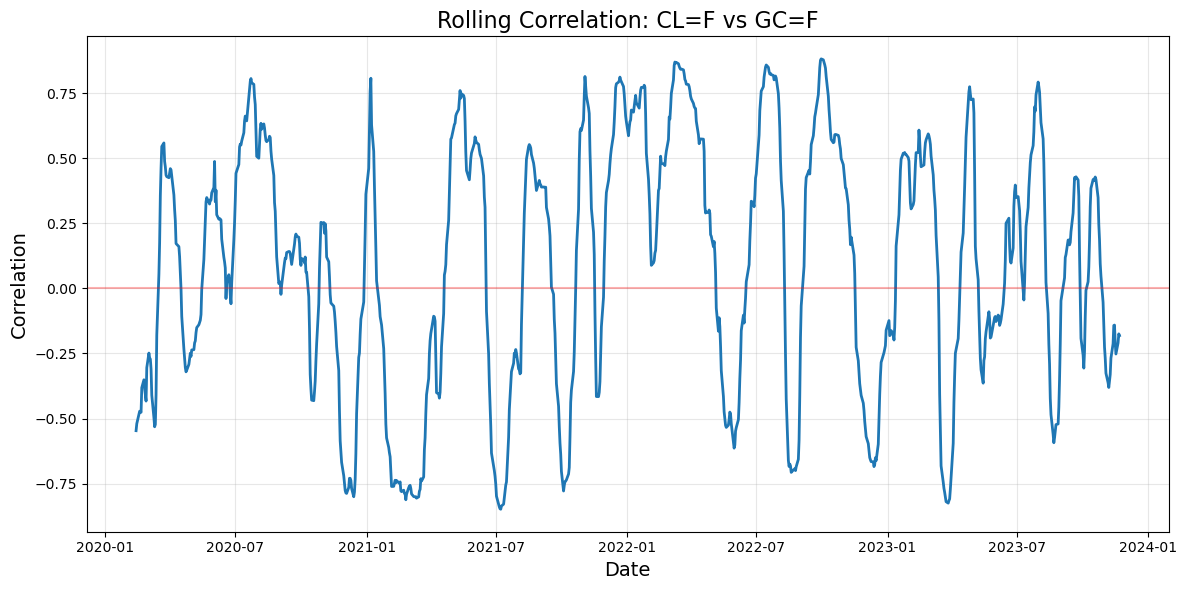

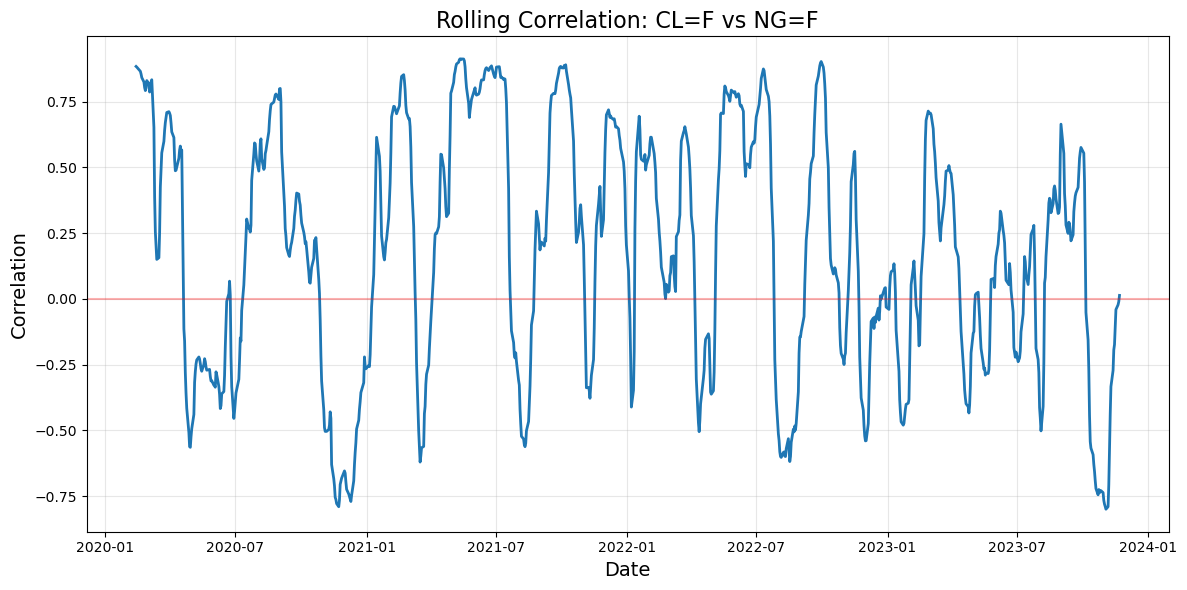

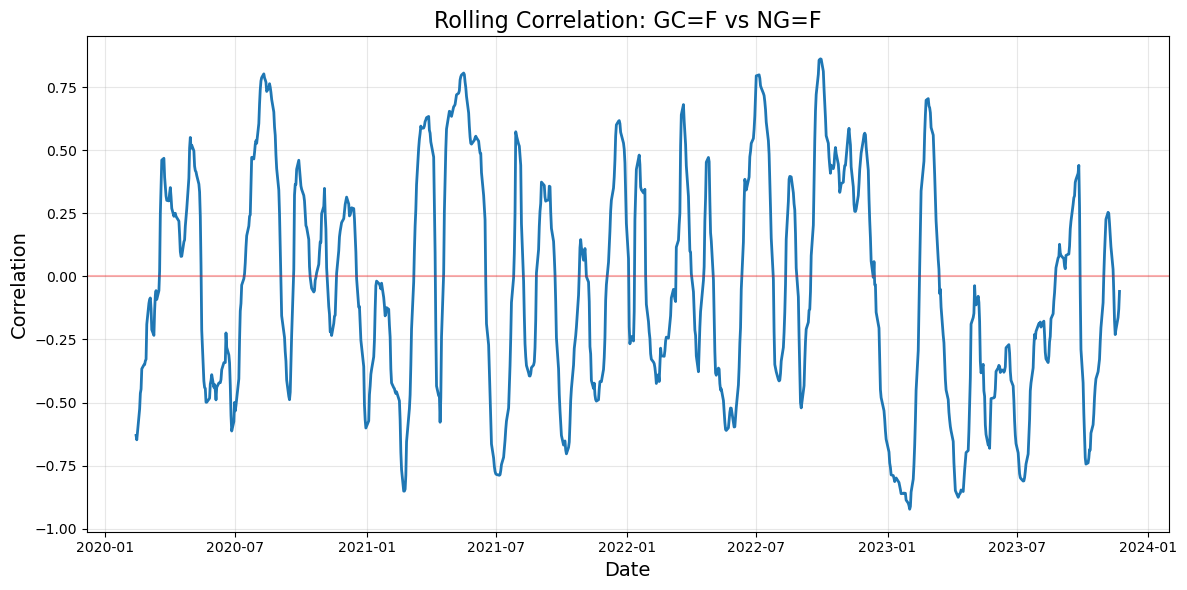

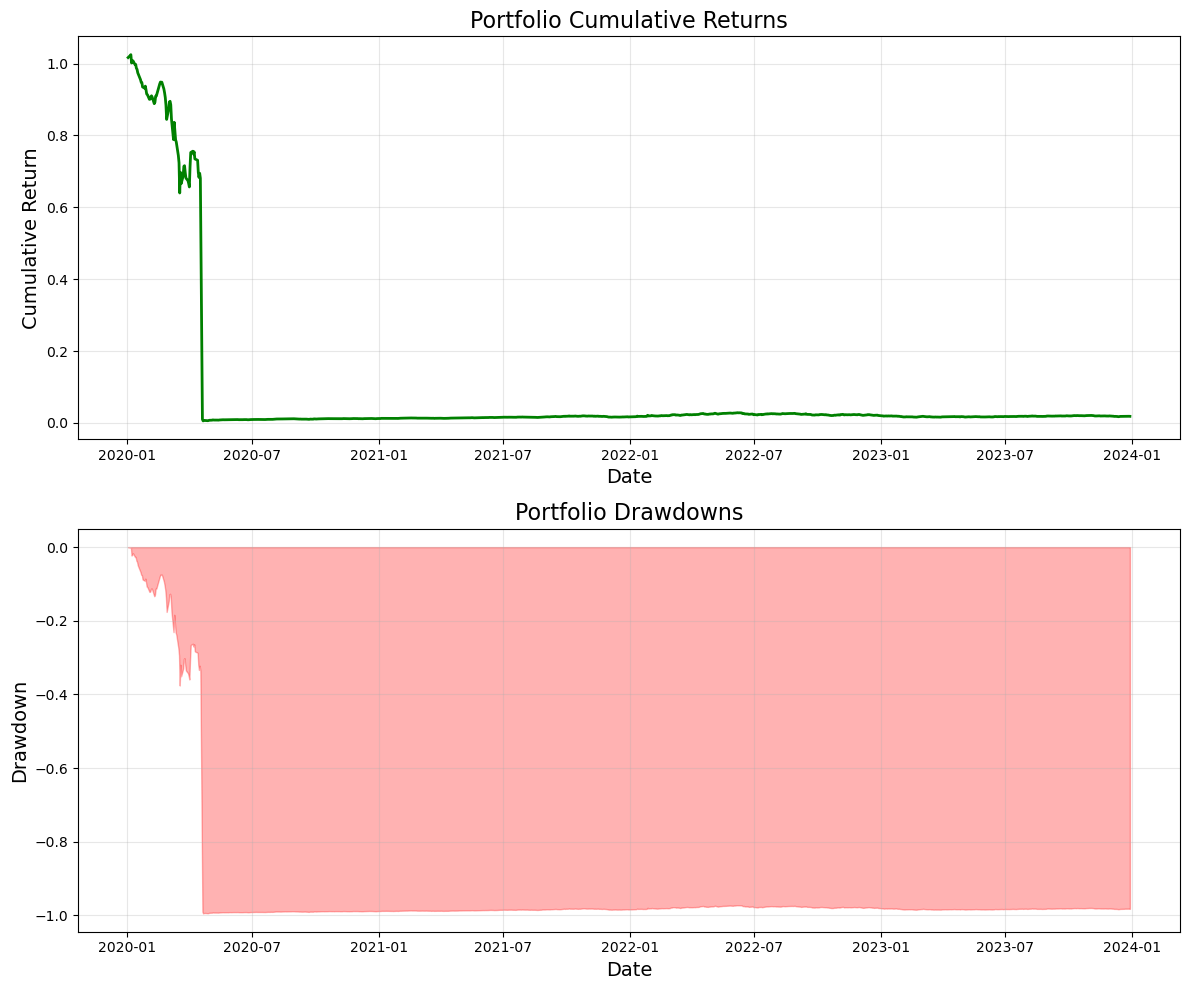


Portfolio Risk Metrics:
Annualized Return: -10.1987
Annualized Volatility: 64.0191
Sharpe Ratio: -0.1593
Sortino Ratio: -0.1251
Calmar Ratio: -0.1026
Max Drawdown: -99.4433
VaR (95%): -2.9729
CVaR (95%): -7.2011
Positive Days (%): 54.4732
Negative Days (%): 45.5268
Return/Risk Ratio: -0.1593

Anomaly Stats:
CL=F: 11 anomalies (1.15%)
GC=F: 5 anomalies (0.52%)
NG=F: 14 anomalies (1.46%)

Analysis complete!


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# =========================
# Data Acquisition and Preprocessing
# =========================
def fetch_commodity_data(tickers, start_date, end_date):
    """
    Fetch commodity price data from Yahoo Finance
    
    Args:
        tickers (list): List of ticker symbols
        start_date (str): Start date in YYYY-MM-DD format
        end_date (str): End date in YYYY-MM-DD format
        
    Returns:
        dict: Dictionary containing dataframes for each ticker
    """
    data = {}
    for ticker in tickers:
        print(f"Fetching data for {ticker}...")
        df = yf.download(ticker, start=start_date, end=end_date)
        df = df.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low',
                              'Close': 'close', 'Volume': 'volume'})
        df.index.name = 'Date'
        # Ensure columns are one-dimensional
        for col in ['open', 'high', 'low', 'close', 'volume']:
            df[col] = df[col].squeeze()
        data[ticker] = df
        print(f"- Got {len(df)} days of data for {ticker}")
    return data

def calculate_technical_indicators(df):
    """
    Calculate technical indicators for price data
    
    Args:
        df (DataFrame): Price data
        
    Returns:
        DataFrame: Price data with technical indicators
    """
    df_ind = df.copy()
    
    # Moving averages
    df_ind['MA_5'] = df_ind['close'].rolling(5).mean()
    df_ind['MA_20'] = df_ind['close'].rolling(20).mean()
    df_ind['MA_50'] = df_ind['close'].rolling(50).mean()
    
    # Exponential moving averages
    df_ind['EMA_12'] = df_ind['close'].ewm(span=12, adjust=False).mean()
    df_ind['EMA_26'] = df_ind['close'].ewm(span=26, adjust=False).mean()
    
    # MACD
    df_ind['MACD'] = df_ind['EMA_12'] - df_ind['EMA_26']
    df_ind['MACD_Signal'] = df_ind['MACD'].ewm(span=9, adjust=False).mean()
    
    # RSI
    delta = df_ind['close'].diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    ema_up = up.ewm(com=13, adjust=False).mean()
    ema_down = down.ewm(com=13, adjust=False).mean()
    df_ind['RSI'] = 100 - (100 / (1 + ema_up / ema_down))
    
    # Bollinger Bands
    df_ind['BB_Middle'] = df_ind['close'].rolling(20).mean()
    df_ind['BB_Std'] = df_ind['close'].rolling(20).std()
    df_ind['BB_Upper'] = df_ind['BB_Middle'] + 2 * df_ind['BB_Std']
    df_ind['BB_Lower'] = df_ind['BB_Middle'] - 2 * df_ind['BB_Std']
    
    # Volatility
    df_ind['Volatility_5'] = df_ind['close'].rolling(5).std()
    df_ind['Volatility_20'] = df_ind['close'].rolling(20).std()
    
    # Momentum
    df_ind['Momentum_5'] = df_ind['close'] / df_ind['close'].shift(5) - 1
    df_ind['Momentum_10'] = df_ind['close'] / df_ind['close'].shift(10) - 1
    
    # Rate of Change
    df_ind['ROC_5'] = df_ind['close'].pct_change(5) * 100
    
    # Average True Range
    high_low = df_ind['high'] - df_ind['low']
    high_close = abs(df_ind['high'] - df_ind['close'].shift())
    low_close = abs(df_ind['low'] - df_ind['close'].shift())
    true_range = np.max(pd.concat([high_low, high_close, low_close], axis=1), axis=1)
    df_ind['ATR_14'] = true_range.rolling(14).mean()
    
    # Price change
    df_ind['Price_Change_1d'] = df_ind['close'].pct_change() * 100
    
    # Drop NaN values
    df_ind = df_ind.dropna()
    df_ind['close'] = df_ind['close'].squeeze()
    
    return df_ind

def generate_commodity_features(df, commodity_type):
    """
    Generate commodity-specific features based on commodity type
    
    Args:
        df (DataFrame): Price data with basic technical indicators
        commodity_type (str): Ticker symbol for the commodity
        
    Returns:
        DataFrame: Enhanced data with commodity-specific features
    """
    df_features = df.copy()
    
    # Commodity-specific features
    if commodity_type == 'CL=F':  # Crude oil
        # Add oil-specific volatility measure
        df_features['Oil_Volatility'] = df_features['close'].pct_change().rolling(30).std() * np.sqrt(252)
        
        # Add contango/backwardation indicator if data available
        if 'open' in df_features.columns:
            df_features['Contango'] = df_features['close'] > df_features['open']
        
        # Seasonal adjustments
        df_features['Month'] = df_features.index.month
        # Summer driving season effect (higher demand in summer)
        summer_months = [6, 7, 8]
        df_features['Summer_Season'] = df_features.index.month.isin(summer_months).astype(int)
        
    elif commodity_type == 'GC=F':  # Gold
        # Gold specific volatility measure
        df_features['Gold_Volatility'] = df_features['close'].pct_change().rolling(20).std() * np.sqrt(252)
        
        # Safe haven indicator (higher volatility in other markets usually correlates with gold price changes)
        df_features['Price_Gap'] = (df_features['high'] - df_features['low']) / df_features['close']
        df_features['Safe_Haven_Demand'] = df_features['Price_Gap'].rolling(30).mean()
        
    elif commodity_type == 'NG=F':  # Natural gas
        # Natural gas specific volatility
        df_features['NG_Volatility'] = df_features['close'].pct_change().rolling(15).std() * np.sqrt(252)
        
        # Seasonal indicator - higher demand in winter
        df_features['Month'] = df_features.index.month
        winter_months = [11, 12, 1, 2]
        df_features['Winter_Season'] = df_features.index.month.isin(winter_months).astype(int)
    
    # Drop temporary columns
    if 'Month' in df_features.columns:
        df_features = df_features.drop('Month', axis=1)
    
    return df_features

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y, seq_length=60):
        self.X = X
        self.y = y
        self.seq_length = seq_length
        
    def __len__(self):
        return len(self.X) - self.seq_length
    
    def __getitem__(self, idx):
        return (self.X[idx:idx+self.seq_length], self.y[idx+self.seq_length])

def preprocess_data(df, seq_length=60, prediction_horizons=[5, 10, 20], target_col='close', test_size=0.2):
    """
    Split data into training and testing sets and create TimeSeriesDataset for multiple horizons.
    
    Args:
        df (DataFrame): Input data
        seq_length (int): Sequence length for time series
        prediction_horizons (list): List of forecast horizons in days
        target_col (str): Target column name
        test_size (float): Proportion of data to use for testing
        
    Returns:
        dict: Dictionary containing datasets and metadata
    """
    results = {}
    
    # Process data for each prediction horizon
    for horizon in prediction_horizons:
        df_h = df.copy()
        # Shift target column to predict price after 'horizon' days
        df_h[f'{target_col}_target_{horizon}d'] = df_h[target_col].shift(-horizon)
        df_h = df_h.dropna()
        
        # Split features and target
        X = df_h.drop([f'{target_col}_target_{horizon}d'], axis=1).values
        y = df_h[f'{target_col}_target_{horizon}d'].values.reshape(-1, 1)
        
        # Normalize features and target
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        target_scaler = MinMaxScaler()
        y_scaled = target_scaler.fit_transform(y)
        
        # Train/test split
        split_idx = int(len(X_scaled) * (1 - test_size))
        X_train_scaled = X_scaled[:split_idx]
        X_test_scaled = X_scaled[split_idx:]
        y_train_scaled = y_scaled[:split_idx]
        y_test_scaled = y_scaled[split_idx:]
        
        # Create Dataset objects
        train_dataset = TimeSeriesDataset(X_train_scaled, y_train_scaled, seq_length)
        test_dataset = TimeSeriesDataset(X_test_scaled, y_test_scaled, seq_length)
        
        results[horizon] = {
            'train_dataset': train_dataset,
            'test_dataset': test_dataset,
            'X_train': X_train_scaled,
            'X_test': X_test_scaled,
            'y_train': y_train_scaled,
            'y_test': y_test_scaled,
            'scaler': scaler,
            'target_scaler': target_scaler,
            'feature_names': df_h.drop([f'{target_col}_target_{horizon}d'], axis=1).columns,
            'data': df_h
        }
    
    return results

# =========================
# Model Definitions: LSTM & Transformer with improvements
# =========================
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2, output_dim=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # x: [batch_size, seq_length, input_dim]
        out, _ = self.lstm(x)
        # Use the output at the last time step
        return self.fc(out[:, -1, :])

class ImprovedTransformerModel(nn.Module):
    def __init__(self, input_dim, d_model=64, nhead=8, num_layers=3,
                 dim_feedforward=256, output_dim=1, dropout=0.2):
        super(ImprovedTransformerModel, self).__init__()
        
        self.input_projection = nn.Sequential(
            nn.Linear(input_dim, d_model),
            nn.LayerNorm(d_model),
            nn.ReLU(),
            nn.Dropout(dropout)
        )
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, 
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout, 
            batch_first=True
        )
        
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer, 
            num_layers=num_layers
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(d_model, d_model // 2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(d_model // 2, output_dim)
        )
        
    def forward(self, x):
        # x: [batch_size, seq_length, input_dim]
        x = self.input_projection(x)
        
        # Create attention mask to focus more on recent data
        seq_len = x.size(1)
        mask = torch.triu(torch.ones(seq_len, seq_len) * float('-inf'), diagonal=1)
        mask = mask.to(x.device)
        
        x = self.transformer_encoder(x, mask=mask)
        
        # Use the output at the last time step with attention weighting
        return self.decoder(x[:, -1, :])

# =========================
# Training and Evaluation
# =========================
def train_model(model, train_loader, test_loader, num_epochs=50, patience=10, lr=0.001):
    """
    Training function with backpropagation and parameter updates.
    
    Args:
        model: PyTorch model
        train_loader: Training data loader
        test_loader: Test data loader
        num_epochs: Maximum number of training epochs
        patience: Early stopping patience
        lr: Learning rate
        
    Returns:
        tuple: Trained model and training history
    """
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=patience//2, factor=0.5)
    
    best_loss = float('inf')
    counter = 0
    best_weights = model.state_dict().copy()
    
    history = {'train_loss': [], 'test_loss': []}
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        batch_losses = []
        for X, y in train_loader:
            X, y = X.float().to(device), y.float().to(device)
            
            # Forward pass
            output = model(X)
            loss = criterion(output, y)
            
            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            batch_losses.append(loss.item())
            
        train_loss = np.mean(batch_losses)
        history['train_loss'].append(train_loss)
        
        # Validation phase
        model.eval()
        test_losses = []
        with torch.no_grad():
            for X_val, y_val in test_loader:
                X_val, y_val = X_val.float().to(device), y_val.float().to(device)
                pred_val = model(X_val)
                val_loss = criterion(pred_val, y_val)
                test_losses.append(val_loss.item())
                
        test_loss = np.mean(test_losses)
        history['test_loss'].append(test_loss)
        
        # Update learning rate
        scheduler.step(test_loss)
        
        # Print progress and early stopping logic
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")
            
        if test_loss < best_loss:
            best_loss = test_loss
            counter = 0
            best_weights = model.state_dict().copy()
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
                
    model.load_state_dict(best_weights)
    return model, history

def calculate_prediction_metrics(y_true, y_pred, include_ci=True, confidence=0.95):
    """
    Calculate comprehensive prediction metrics with confidence intervals
    
    Args:
        y_true: True values
        y_pred: Predicted values
        include_ci: Whether to include confidence intervals
        confidence: Confidence level
        
    Returns:
        dict: Dictionary of metrics
    """
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Filter out zeros for MAPE calculation
    mask = y_true != 0
    mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
    
    # Calculate errors and residuals
    errors = y_true - y_pred
    abs_errors = np.abs(errors)
    
    # Calculate R-squared
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum(errors ** 2)
    r_squared = 1 - (ss_residual / ss_total) if ss_total != 0 else 0
    
    # Direction accuracy (correct prediction of up/down movement)
    y_true_dir = np.sign(np.diff(y_true))
    y_pred_dir = np.sign(np.diff(y_pred))
    dir_accuracy = np.mean(y_true_dir == y_pred_dir) * 100
    
    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape,
        'R_Squared': r_squared,
        'Direction_Accuracy': dir_accuracy
    }
    
    if include_ci:
        # Calculate confidence intervals for metrics using bootstrap
        confidence_intervals = {}
        
        # Basic confidence interval for MAE based on standard error
        std_error = np.std(abs_errors) / np.sqrt(len(abs_errors))
        z_score = 1.96  # 95% confidence
        confidence_intervals['MAE_CI'] = (mae - z_score * std_error, mae + z_score * std_error)
        
        metrics['confidence_intervals'] = confidence_intervals
    
    return metrics

# =========================
# Enhanced Autoencoder for Anomaly Detection
# =========================
class EnhancedAutoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim=16, hidden_dims=[64, 32]):
        super(EnhancedAutoencoder, self).__init__()
        
        # Build encoder
        encoder_layers = []
        encoder_layers.append(nn.Linear(input_dim, hidden_dims[0]))
        encoder_layers.append(nn.ReLU(True))
        
        for i in range(len(hidden_dims)-1):
            encoder_layers.append(nn.Linear(hidden_dims[i], hidden_dims[i+1]))
            encoder_layers.append(nn.ReLU(True))
            
        encoder_layers.append(nn.Linear(hidden_dims[-1], encoding_dim))
        encoder_layers.append(nn.ReLU(True))
        
        self.encoder = nn.Sequential(*encoder_layers)
        
        # Build decoder (mirror of encoder)
        decoder_layers = []
        decoder_layers.append(nn.Linear(encoding_dim, hidden_dims[-1]))
        decoder_layers.append(nn.ReLU(True))
        
        for i in range(len(hidden_dims)-1, 0, -1):
            decoder_layers.append(nn.Linear(hidden_dims[i], hidden_dims[i-1]))
            decoder_layers.append(nn.ReLU(True))
            
        decoder_layers.append(nn.Linear(hidden_dims[0], input_dim))
        decoder_layers.append(nn.Tanh())
        
        self.decoder = nn.Sequential(*decoder_layers)
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def encode(self, x):
        return self.encoder(x)

def train_autoencoder(model, data, batch_size=64, num_epochs=50, lr=0.001):
    """
    Enhanced autoencoder training function with monitoring
    
    Args:
        model: Autoencoder model
        data: Training data
        batch_size: Batch size
        num_epochs: Number of training epochs
        lr: Learning rate
        
    Returns:
        tuple: Trained model and training history
    """
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    history = {'loss': []}
    
    dataloader = DataLoader(torch.FloatTensor(data), batch_size=batch_size, shuffle=True)
    
    for epoch in range(num_epochs):
        batch_losses = []
        for batch in dataloader:
            batch = batch.to(device).float()
            
            optimizer.zero_grad()
            recon = model(batch)
            loss = criterion(recon, batch)
            loss.backward()
            optimizer.step()
            
            batch_losses.append(loss.item())
            
        epoch_loss = np.mean(batch_losses)
        history['loss'].append(epoch_loss)
        
        if (epoch + 1) % 10 == 0:
            print(f"Autoencoder Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
            
    return model, history

def detect_anomalies_autoencoder(model, data, percentile=95):
    """
    Detect anomalies using autoencoder reconstruction error
    
    Args:
        model: Trained autoencoder model
        data: Input data
        percentile: Percentile threshold for anomaly detection
        
    Returns:
        tuple: Reconstruction errors and anomaly flags
    """
    model.eval()
    data_tensor = torch.FloatTensor(data).to(device)
    
    with torch.no_grad():
        recon = model(data_tensor)
        # Calculate reconstruction error for each sample and feature
        error = torch.mean((data_tensor - recon) ** 2, dim=1).cpu().numpy()
        
    # Determine threshold based on percentile
    thresh = np.percentile(error, percentile)
    
    return error, error > thresh

# =========================
# Enhanced Anomaly Detection
# =========================
def detect_price_shocks(df, window=20, std_mult=3):
    """
    Detect price shocks based on returns
    
    Args:
        df: Price dataframe
        window: Rolling window size
        std_mult: Standard deviation multiplier for threshold
        
    Returns:
        Series: Boolean series indicating price shocks
    """
    returns = df['close'].pct_change()
    mean = returns.rolling(window).mean()
    std = returns.rolling(window).std()
    return (returns > mean + std_mult * std) | (returns < mean - std_mult * std)

def detect_volatility_spikes(df, short_window=5, long_window=20, std_mult=3):
    """
    Detect volatility spikes based on ratio of short to long-term volatility
    
    Args:
        df: Price dataframe
        short_window: Short-term window
        long_window: Long-term window
        std_mult: Standard deviation multiplier for threshold
        
    Returns:
        Series: Boolean series indicating volatility spikes
    """
    short_vol = df['close'].pct_change().rolling(short_window).std()
    long_vol = df['close'].pct_change().rolling(long_window).std()
    ratio = short_vol / long_vol
    mean = ratio.rolling(long_window).mean()
    std = ratio.rolling(long_window).std()
    return ratio > (mean + std_mult * std)

def detect_trend_breaks(df, ma_short=5, ma_long=20, pct=5):
    """
    Detect trend breaks based on moving average crossovers
    
    Args:
        df: Price dataframe
        ma_short: Short-term moving average window
        ma_long: Long-term moving average window
        pct: Percentage threshold for price deviation
        
    Returns:
        Series: Boolean series indicating trend breaks
    """
    short_ma = df['close'].rolling(ma_short).mean()
    long_ma = df['close'].rolling(ma_long).mean()
    # Detect crossovers (sign changes in the difference between MAs)
    crossover = np.sign(short_ma - long_ma).diff().abs()
    # Calculate percentage deviation from long-term MA
    deviation = ((df['close'] - long_ma) / long_ma * 100).abs()
    # Identify significant crossovers with large price deviations
    return (crossover > 0) & (deviation > pct)

def detect_supply_chain_disruptions(df, window=20, std_mult=2):
    """
    Detect potential supply chain disruptions based on price patterns
    
    Args:
        df: Price dataframe
        window: Rolling window size
        std_mult: Standard deviation multiplier for threshold
        
    Returns:
        Series: Boolean series indicating potential supply chain disruptions
    """
    ma = df['close'].rolling(window).mean()
    # Calculate relative deviation from moving average
    deviation = (df['close'] - ma) / ma
    std_dev = deviation.rolling(window*2).std()
    # Identify significant positive deviations (supply constraints often cause price spikes)
    return deviation > (std_mult * std_dev)

def detect_correlation_shifts(df_main, df_related, window=20, std_mult=2):
    """
    Detect shifts in correlation between two price series
    
    Args:
        df_main: Main price dataframe
        df_related: Related price dataframe
        window: Rolling window size
        std_mult: Standard deviation multiplier for threshold
        
    Returns:
        Series: Boolean series indicating correlation shifts
    """
    # Find common dates
    common = df_main.index.intersection(df_related.index)
    
    # Extract close prices
    main = df_main.loc[common]['close'].squeeze()
    related = df_related.loc[common]['close'].squeeze()
    
    # Calculate rolling correlation
    rolling_corr = main.rolling(window).corr(related)
    
    # Detect significant changes in correlation
    change = rolling_corr.diff().abs()
    mean = change.rolling(window).mean()
    std = change.rolling(window).std()
    
    return change > (mean + std_mult * std)

def detect_all_anomalies(df, related_dfs=None, window=20, thresholds=None):
    """
    Comprehensive anomaly detection combining multiple methods
    
    Args:
        df: Price dataframe
        related_dfs: Dictionary of related price dataframes
        window: Rolling window size
        thresholds: Dictionary of thresholds for different anomaly types
        
    Returns:
        DataFrame: Anomaly detection results
    """
    # Set default thresholds if not provided
    if thresholds is None:
        thresholds = {
            'price_shock': 3,
            'volatility_spike': 3,
            'trend_break': 5,
            'supply_disruption': 2,
            'volume_surge': 2,
            'correlation_shift': 2
        }
    
    results = pd.DataFrame(index=df.index)
    
    try:
        # Apply individual anomaly detection methods
        results['price_shock'] = detect_price_shocks(df, window, thresholds['price_shock'])
        results['volatility_spike'] = detect_volatility_spikes(df, window//4, window, thresholds['volatility_spike'])
        results['trend_break'] = detect_trend_breaks(df, window//4, window, thresholds['trend_break'])
        results['supply_disruption'] = detect_supply_chain_disruptions(df, window, thresholds['supply_disruption'])
        
        # Volume anomalies if volume data is available
        if 'volume' in df.columns:
            vol_mean = df['volume'].rolling(window).mean()
            vol_std = df['volume'].rolling(window).std()
            results['volume_surge'] = df['volume'] > (vol_mean + thresholds['volume_surge'] * vol_std)
    except Exception as e:
        print("Warning:", e)
    
    # Detect correlation shifts with related commodities
    if related_dfs:
        for name, rel_df in related_dfs.items():
            try:
                # Create aligned dataframe for correlation analysis
                main = df['close'].squeeze()
                related = rel_df['close'].squeeze()
                aligned = pd.DataFrame({
                    'main': main, 
                    f'related_{name}': related
                }, index=main.index).dropna()
                
                if len(aligned) > window:
                    # Calculate rolling correlation
                    aligned[f'corr_{name}'] = aligned['main'].rolling(window).corr(aligned[f'related_{name}'])
                    # Detect changes in correlation
                    aligned[f'corr_change_{name}'] = aligned[f'corr_{name}'].diff().abs()
                    thresh = (aligned[f'corr_change_{name}'].rolling(window).mean() + 
                             thresholds['correlation_shift'] * aligned[f'corr_change_{name}'].rolling(window).std())
                    shifts = aligned[f'corr_change_{name}'] > thresh
                    
                    # Add to results
                    results[f'correlation_shift_{name}'] = False
                    valid = shifts.index.intersection(results.index)
                    results.loc[valid, f'correlation_shift_{name}'] = shifts.loc[valid]
            except Exception as e:
                print(f"Warning with {name}:", e)
                results[f'correlation_shift_{name}'] = False
    
    # Fill NaN values with False
    results = results.fillna(False)
    
    # Calculate anomaly score as weighted average of individual anomaly flags
    cols = [col for col in results.columns if col not in ['anomaly_score', 'is_anomaly']]
    
    if cols:
        # Define weights for different anomaly types
        weights = {
            'price_shock': 0.25,
            'volatility_spike': 0.20,
            'trend_break': 0.15,
            'supply_disruption': 0.25,
            'volume_surge': 0.10,
        }
        
        # Add weights for correlation shifts
        for col in cols:
            if col.startswith('correlation_shift_'):
                weights[col] = 0.05
                
        # Normalize weights to sum to 1
        weight_sum = sum(weights.get(col, 0.1) for col in cols)
        normalized_weights = {col: weights.get(col, 0.1) / weight_sum for col in cols}
        
        # Calculate weighted anomaly score
        results['anomaly_score'] = sum(results[col] * normalized_weights[col] for col in cols)
        
        # Determine anomaly threshold (dynamic or fixed)
        anomaly_threshold = 0.3
        results['is_anomaly'] = results['anomaly_score'] > anomaly_threshold
        
        # Calculate F1-score if true anomalies are known
        if 'true_anomaly' in df.columns:
            true_anomalies = df['true_anomaly']
            pred_anomalies = results['is_anomaly']
            valid_idx = ~pd.isna(true_anomalies)
            if valid_idx.any():
                precision = precision_score(true_anomalies[valid_idx], pred_anomalies[valid_idx])
                recall = recall_score(true_anomalies[valid_idx], pred_anomalies[valid_idx])
                f1 = f1_score(true_anomalies[valid_idx], pred_anomalies[valid_idx])
                results['metrics'] = {'precision': precision, 'recall': recall, 'f1_score': f1}
    else:
        results['anomaly_score'] = 0
        results['is_anomaly'] = False
    
    return results

def predict_future_anomalies(df, anomalies, window=60, horizons=[5, 10, 20]):
    """
    Predict future anomalies for different time horizons
    
    Args:
        df: Feature dataframe
        anomalies: Historical anomalies
        window: Input window size
        horizons: List of prediction horizons in days
        
    Returns:
        dict: Predicted anomaly probabilities for each horizon
    """
    results = {}
    
    # Select columns to use as features
    cols = ['close', 'Volatility_20', 'RSI', 'MACD']
    if 'volume' in df.columns:
        cols.append('volume')
    cols = [c for c in cols if c in df.columns]
    
    for horizon in horizons:
        # Create features and targets
        features, targets = [], []
        
        for i in range(window, len(df) - horizon):
            # Features: window of data
            features.append(df.iloc[i-window:i][cols].values.flatten())
            # Target: 1 if anomaly in horizon, 0 otherwise
            future = df.index[i:i+horizon]
            future_anomalies = anomalies.loc[future, 'is_anomaly'] if len(future) > 0 else pd.Series([False])
            targets.append(1 if any(future_anomalies) else 0)
        
        if not features:
            results[horizon] = pd.DataFrame({'anomaly_probability': 0}, index=df.index)
            continue
            
        # Train a random forest classifier
        clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        clf.fit(features, targets)
        
        # Predict probabilities for entire dataset
        probs = np.zeros(len(df))
        for i in range(window, len(df)):
            if i + horizon <= len(df):
                X = df.iloc[i-window:i][cols].values.flatten().reshape(1, -1)
                if X.shape[1] == len(features[0]):
                    proba = clf.predict_proba(X)
                    if proba.shape[1] > 1:  # If we have probabilities for both classes
                        anomaly_prob = proba[0, 1]  # Probability of anomaly (class 1)
                    else:
                        anomaly_prob = 0.0 if clf.classes_[0] == 0 else 1.0
                    probs[i] = anomaly_prob
        
        # Store results for this horizon
        results[horizon] = pd.DataFrame({
            'anomaly_probability': probs,
            'threshold': 0.5,  # Default threshold
            'is_predicted_anomaly': probs > 0.5
        }, index=df.index)
    
    return results

def link_anomalies_to_events(dates, events_db=None):
    """
    Link detected anomalies to known events
    
    Args:
        dates: Dates of detected anomalies
        events_db: Database of known events
        
    Returns:
        dict: Dictionary linking anomalies to events
    """
    if events_db is None:
        # Default events database (sample data)
        events_db = pd.DataFrame({
            'date': ['2020-03-15', '2020-04-20', '2021-02-15', '2022-02-24', '2022-03-08'],
            'description': [
                'COVID-19 declared pandemic', 
                'WTI futures negative prices', 
                'Texas winter storm', 
                'Russia-Ukraine conflict', 
                'Oil import ban'
            ],
            'impact': ['high', 'extreme', 'medium', 'high', 'high'],
            'source': ['WHO', 'Market', 'News', 'News', 'Gov'],
            'type': ['pandemic', 'market', 'weather', 'geopolitical', 'policy']
        })
    
    linked = {}
    window = timedelta(days=3)  # Window for linking (3 days before/after)
    
    for d in dates:
        d_parsed = pd.to_datetime(d)
        linked[d_parsed] = []
        
        for _, event in events_db.iterrows():
            event_date = pd.to_datetime(event['date'])
            if abs(d_parsed - event_date) <= window:
                linked[d_parsed].append({
                    'date': event_date,
                    'description': event['description'],
                    'impact': event.get('impact', 'unknown'),
                    'source': event.get('source', 'unknown'),
                    'type': event.get('type', 'unknown')
                })
    
    return linked

def analyze_anomaly_impact(df, anomalies, forward_days=[5, 10, 20]):
    """
    Analyze impact of anomalies on future prices
    
    Args:
        df: Price dataframe
        anomalies: Anomaly dataframe
        forward_days: List of forward periods to analyze
        
    Returns:
        DataFrame: Impact analysis
    """
    impacts = []
    
    for d in anomalies.index[anomalies['is_anomaly']]:
        idx = df.index.get_loc(d)
        
        # Skip if not enough data after anomaly
        if idx + max(forward_days) >= len(df):
            continue
            
        price = df.iloc[idx]['close']
        impact = {
            'date': d,
            'price': price,
            'anomaly_types': [col for col in anomalies.columns 
                              if col not in ['anomaly_score','is_anomaly'] 
                              and anomalies.loc[d, col]],
            'anomaly_score': anomalies.loc[d, 'anomaly_score']
        }
        
        # Calculate impact for each forward period
        for days in forward_days:
            if idx + days < len(df):
                forward_prices = df.iloc[idx:idx+days+1]['close']
                
                impact.update({
                    f'max_drawdown_{days}d': (forward_prices.min() - price)/price * 100,
                    f'max_gain_{days}d': (forward_prices.max() - price)/price * 100,
                    f'end_return_{days}d': (forward_prices.iloc[-1] - price)/price * 100,
                    f'volatility_{days}d': forward_prices.pct_change().std() * 100,
                })
        
        impacts.append(impact)
    
    return pd.DataFrame(impacts)

def generate_anomaly_report(df, anomalies, impact, linked_events=None):
    """
    Generate comprehensive anomaly report
    
    Args:
        df: Price dataframe
        anomalies: Anomaly dataframe
        impact: Anomaly impact analysis
        linked_events: Dictionary linking anomalies to events
        
    Returns:
        dict: Comprehensive anomaly report
    """
    # Count anomalies by type
    counts = {col: anomalies[col].sum() for col in anomalies.columns 
              if col not in ['anomaly_score','is_anomaly']}
    
    # Analyze impact by anomaly type
    impact_by = {}
    if not impact.empty:
        all_types = set(t for lst in impact['anomaly_types'] for t in lst)
        
        for t in all_types:
            sub = impact[impact['anomaly_types'].apply(lambda x: t in x)]
            if not sub.empty:
                # For each period, calculate average impact metrics
                periods = [int(col.split('_')[-1][:-1]) for col in sub.columns 
                          if col.startswith('end_return_')]
                
                type_impact = {
                    'count': len(sub),
                    'avg_score': sub['anomaly_score'].mean()
                }
                
                for period in periods:
                    type_impact.update({
                        f'avg_drawdown_{period}d': sub[f'max_drawdown_{period}d'].mean(),
                        f'avg_gain_{period}d': sub[f'max_gain_{period}d'].mean(),
                        f'avg_return_{period}d': sub[f'end_return_{period}d'].mean(),
                        f'avg_volatility_{period}d': sub[f'volatility_{period}d'].mean()
                    })
                
                impact_by[t] = type_impact
    
    # Analyze linked events
    event_summary = {}
    if linked_events:
        # Count events by source, impact, and type
        src = {}
        imp = {}
        evt_type = {}
        
        for ev_list in linked_events.values():
            for ev in ev_list:
                src[ev.get('source', 'unknown')] = src.get(ev.get('source', 'unknown'), 0) + 1
                imp[ev.get('impact', 'unknown')] = imp.get(ev.get('impact', 'unknown'), 0) + 1
                evt_type[ev.get('type', 'unknown')] = evt_type.get(ev.get('type', 'unknown'), 0) + 1
        
        event_summary = {
            'total': sum(len(v) for v in linked_events.values()),
            'by_source': src,
            'by_impact': imp,
            'by_type': evt_type
        }
    
    # Compile the full report
    return {
        'summary': {
            'total_anomalies': anomalies['is_anomaly'].sum(),
            'anomaly_rate': anomalies['is_anomaly'].mean()*100,
            'avg_score': anomalies['anomaly_score'].mean(),
            'max_score': anomalies['anomaly_score'].max(),
            'counts': counts
        },
        'impact': {
            'avg_drawdown': impact['max_drawdown_5d'].mean() if not impact.empty and 'max_drawdown_5d' in impact.columns else None,
            'avg_gain': impact['max_gain_5d'].mean() if not impact.empty and 'max_gain_5d' in impact.columns else None,
            'avg_end_return': impact['end_return_5d'].mean() if not impact.empty and 'end_return_5d' in impact.columns else None,
            'by_type': impact_by
        },
        'events': event_summary,
        'f1_score': anomalies.get('metrics', {}).get('f1_score', None)
    }

# =========================
# Risk and Correlation Analysis
# =========================
def analyze_commodity_correlations(data_dict, window=30):
    """
    Analyze correlations between commodities
    
    Args:
        data_dict: Dictionary of price dataframes
        window: Rolling window size
        
    Returns:
        tuple: Correlation matrix and rolling correlations
    """
    # Extract close prices for each commodity
    prices = pd.DataFrame({k: v['close'].squeeze() for k, v in data_dict.items()})
    
    # Calculate static correlation matrix
    corr_matrix = prices.corr()
    
    # Calculate rolling correlations between pairs
    rolling_corrs = {}
    keys = list(data_dict.keys())
    
    for i in range(len(keys)):
        for j in range(i+1, len(keys)):
            pair = (keys[i], keys[j])
            rolling_corrs[pair] = prices[keys[i]].rolling(window).corr(prices[keys[j]])
    
    return corr_matrix, rolling_corrs

def calculate_risk_metrics(returns):
    """
    Calculate comprehensive risk metrics for returns
    
    Args:
        returns: Series of returns
        
    Returns:
        dict: Risk metrics
    """
    annual = 252  # Trading days in a year
    
    # Basic statistics
    mean_ret = np.mean(returns)
    std_ret = np.std(returns)
    
    # Annualized metrics
    annual_return = mean_ret * annual
    annual_volatility = std_ret * np.sqrt(annual)
    
    # Risk-adjusted metrics
    sharpe = (mean_ret / std_ret) * np.sqrt(annual) if std_ret != 0 else 0
    
    # Drawdown analysis
    cum_ret = (1 + returns).cumprod()
    peak = cum_ret.expanding().max()
    drawdown = (cum_ret / peak) - 1
    max_dd = drawdown.min()
    
    # Downside metrics
    neg = returns[returns < 0]
    sortino = (mean_ret / np.std(neg) if len(neg) else 1e-10) * np.sqrt(annual)
    calmar = (annual_return) / abs(max_dd) if max_dd != 0 else np.inf
    
    # Value at Risk
    var_95 = np.percentile(returns, 5)
    cvar_95 = returns[returns <= var_95].mean()
    
    # Additional metrics
    pos_days = (returns > 0).mean() * 100  # Percentage of positive days
    neg_days = (returns < 0).mean() * 100  # Percentage of negative days
    
    return {
        'Annualized Return': annual_return * 100,
        'Annualized Volatility': annual_volatility * 100,
        'Sharpe Ratio': sharpe,
        'Sortino Ratio': sortino,
        'Calmar Ratio': calmar,
        'Max Drawdown': max_dd * 100,
        'VaR (95%)': var_95 * 100,
        'CVaR (95%)': cvar_95 * 100,
        'Positive Days (%)': pos_days,
        'Negative Days (%)': neg_days,
        'Return/Risk Ratio': annual_return / annual_volatility if annual_volatility != 0 else 0
    }

def assess_supply_chain_risk(ticker, df, anomalies):
    """
    Assess supply chain risk for a commodity with improved scaling
    
    Args:
        ticker: Commodity ticker
        df: Price dataframe
        anomalies: Anomaly dataframe
        
    Returns:
        dict: Supply chain risk assessment
    """
    # Commodity-specific supply chain profiles
    profiles = {
        'CL=F': {
            'supply_chain_length': 'long',
            'production_flexibility': 'low',
            'storage_capacity': 'medium',
            'transportation_dependencies': 'high',
            'geopolitical_sensitivity': 'high'  # Changed from 'very high' to 'high'
        },
        'GC=F': {
            'supply_chain_length': 'medium',
            'production_flexibility': 'low',  # Changed from 'very low' to 'low'
            'storage_capacity': 'high',
            'transportation_dependencies': 'low',
            'geopolitical_sensitivity': 'medium'
        },
        'NG=F': {
            'supply_chain_length': 'medium',
            'production_flexibility': 'medium',
            'storage_capacity': 'low',
            'transportation_dependencies': 'high',  # Changed from 'very high' to 'high'
            'geopolitical_sensitivity': 'medium'    # Changed from 'high' to 'medium'
        }
    }
    
    # Get profile for this commodity
    profile = profiles.get(ticker, {})
    
    # Count relevant anomalies
    supply_disrupt_count = anomalies.get('supply_disruption', pd.Series()).sum()
    price_shock_count = anomalies.get('price_shock', pd.Series()).sum()
    vol_spike_count = anomalies.get('volatility_spike', pd.Series()).sum()
    
    # Calculate total anomaly count
    total_data_points = len(anomalies)
    anomaly_percentage = 100 * (supply_disrupt_count + price_shock_count + vol_spike_count) / (total_data_points * 3)
    
    # Risk factor scoring table (reduced weights)
    risk_factors = {
        'supply_chain_length': {'long': 2.5, 'medium': 1.5, 'short': 0.5},
        'production_flexibility': {'very low': 3, 'low': 2, 'medium': 1, 'high': 0.5},
        'storage_capacity': {'low': 2.5, 'medium': 1.5, 'high': 0.5},
        'transportation_dependencies': {'very high': 3, 'high': 2, 'medium': 1, 'low': 0.5},
        'geopolitical_sensitivity': {'very high': 3, 'high': 2, 'medium': 1, 'low': 0.5}
    }
    
    # Calculate base risk score with maximum normalization
    base_score = sum(risk_factors[f][profile[f]] for f in profile if f in risk_factors)
    max_base_score = 14  # Maximum possible base score with new weights
    base_score_pct = (base_score / max_base_score) * 60  # Scale to max 60% of total score
    
    # Calculate normalized anomaly adjustment based on actual anomaly percentages
    # This makes the adjustment proportional to how frequent anomalies actually are
    anomaly_weight_factor = 0.8  # Reduce the impact of anomalies on total score
    
    # Linear scaling with diminishing returns for larger anomaly counts
    if anomaly_percentage > 5:
        anomaly_adjustment = 30 + (anomaly_percentage - 5) * 0.5  # Max contribution 40%
    else:
        anomaly_adjustment = anomaly_percentage * 6  # 6% per percentage point up to 5%
    
    # Apply weight factor
    anomaly_adjustment *= anomaly_weight_factor
    
    # Cap the anomaly adjustment at 40%
    anomaly_adjustment = min(anomaly_adjustment, 40)
    
    # Calculate total score with an inherent cap
    total_score = min(base_score_pct + anomaly_adjustment, 100)
    
    # Determine risk level with more granular thresholds
    if total_score >= 80:
        risk_level = 'Very High'
    elif total_score >= 60:
        risk_level = 'High'
    elif total_score >= 40:
        risk_level = 'Medium'
    elif total_score >= 20:
        risk_level = 'Low'
    else:
        risk_level = 'Very Low'
    
    # Recent trend analysis with improved sensitivity
    lookback_period = min(30, len(anomalies) // 3)  # Dynamic lookback period
    if lookback_period > 0:
        recent_anomaly_count = sum(anomalies.iloc[-lookback_period:]['is_anomaly'])
        historical_anomaly_rate = anomalies['is_anomaly'].mean()
        recent_anomaly_rate = anomalies.iloc[-lookback_period:]['is_anomaly'].mean()
        
        threshold_increase = 1.3  # Reduced from 1.5
        threshold_decrease = 0.7  # Increased from 0.5
        
        if recent_anomaly_rate > (historical_anomaly_rate * threshold_increase) and recent_anomaly_rate > 0.05:
            risk_trend = 'Increasing'
        elif recent_anomaly_rate < (historical_anomaly_rate * threshold_decrease) or recent_anomaly_rate == 0:
            risk_trend = 'Decreasing'
        else:
            risk_trend = 'Stable'
    else:
        recent_anomaly_count = 0
        risk_trend = 'Insufficient Data'
    
    return {
        'commodity_type': ticker,
        'supply_chain_profile': profile,
        'supply_disruption_count': int(supply_disrupt_count),
        'price_shock_count': int(price_shock_count),
        'volatility_spike_count': int(vol_spike_count),
        'anomaly_percentage': anomaly_percentage,
        'base_risk_score': base_score_pct,
        'anomaly_risk_adjustment': anomaly_adjustment,
        'total_risk_score': total_score,
        'risk_level': risk_level,
        'risk_trend': risk_trend,
        'recent_anomaly_count': recent_anomaly_count
    }

# =========================
# Visualization Functions
# =========================
def visualize_predictions(y_true, y_pred, dates, title="Price Predictions", include_ci=True, ci_level=0.9):
    """
    Visualize price predictions with confidence intervals
    
    Args:
        y_true: True prices
        y_pred: Predicted prices
        dates: Date index
        title: Plot title
        include_ci: Whether to include confidence intervals
        ci_level: Confidence interval level
        
    Returns:
        matplotlib figure
    """
    plt.figure(figsize=(12, 6))
    
    # Plot actual and predicted prices
    plt.plot(dates, y_true, label='Actual', linewidth=2)
    plt.plot(dates, y_pred, label='Predicted', linestyle='--', linewidth=2)
    
    if include_ci:
        # Calculate prediction errors
        errors = y_true - y_pred
        
        # Calculate confidence interval
        z_score = 1.96  # 95% confidence
        std_error = np.std(errors)
        ci_width = z_score * std_error
        
        # Plot confidence interval
        plt.fill_between(
            dates, 
            y_pred - ci_width, 
            y_pred + ci_width, 
            alpha=0.2, 
            color='blue',
            label=f'{int(ci_level*100)}% Confidence Interval'
        )
    
    plt.title(title, fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    return plt

def visualize_anomalies(df, anomalies, future_anomalies=None, title="Anomaly Detection Results"):
    """
    Visualize detected anomalies and predicted future anomalies
    
    Args:
        df: Price dataframe
        anomalies: Anomaly dataframe
        future_anomalies: Future anomaly predictions
        title: Plot title
        
    Returns:
        matplotlib figure
    """
    fig, axs = plt.subplots(3, 1, figsize=(12, 14), sharex=True)
    
    # Plot price with anomalies
    axs[0].plot(df.index, df['close'], label='Price', linewidth=1.5)
    
    if 'is_anomaly' in anomalies.columns:
        # Highlight detected anomalies
        anomaly_points = df.loc[anomalies['is_anomaly'], 'close']
        axs[0].scatter(
            anomaly_points.index, 
            anomaly_points.values,
            color='red', 
            s=50, 
            label='Detected Anomaly'
        )
    
    if future_anomalies is not None and 5 in future_anomalies:
        # Highlight predicted anomalies
        future_prob = future_anomalies[5]['anomaly_probability']
        threshold = future_anomalies[5]['threshold']
        pred_anomaly_idx = future_anomalies[5]['is_predicted_anomaly']
        
        if pred_anomaly_idx.sum() > 0:
            pred_points = df.loc[pred_anomaly_idx, 'close']
            axs[0].scatter(
                pred_points.index, 
                pred_points.values,
                color='orange', 
                marker='x', 
                s=50, 
                label='Predicted Anomaly (5d)'
            )
    
    axs[0].set_title(f"{title} - Price Chart", fontsize=14)
    axs[0].set_ylabel('Price', fontsize=12)
    axs[0].legend()
    axs[0].grid(alpha=0.3)
    
    # Plot anomaly score
    axs[1].plot(anomalies.index, anomalies['anomaly_score'], color='purple', linewidth=1.5)
    axs[1].axhline(0.3, color='red', linestyle='--', alpha=0.7, label='Threshold')
    axs[1].set_title("Anomaly Score", fontsize=14)
    axs[1].set_ylabel('Score', fontsize=12)
    axs[1].set_ylim(0, 1)
    axs[1].legend()
    axs[1].grid(alpha=0.3)
    
    # Plot future anomaly probabilities if available
    if future_anomalies is not None:
        for horizon in sorted(future_anomalies.keys())[:3]:  # Show up to 3 horizons
            horizon_data = future_anomalies[horizon]
            axs[2].plot(
                horizon_data.index, 
                horizon_data['anomaly_probability'], 
                label=f'{horizon}d Horizon', 
                linewidth=1.5
            )
        
        axs[2].axhline(0.5, color='red', linestyle='--', alpha=0.7, label='Threshold')
        axs[2].set_title("Future Anomaly Probability", fontsize=14)
        axs[2].set_ylabel('Probability', fontsize=12)
        axs[2].set_ylim(0, 1)
        axs[2].legend()
        axs[2].grid(alpha=0.3)
    else:
        # Plot anomaly types if future anomalies not available
        for col in [c for c in anomalies.columns if c not in ['anomaly_score','is_anomaly']]:
            count = anomalies[col].rolling(30).sum()
            axs[2].plot(anomalies.index, count, label=col, linewidth=1.5)
        
        axs[2].set_title("Anomaly Types (30-day Rolling Count)", fontsize=14)
        axs[2].set_ylabel('Count', fontsize=12)
        axs[2].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axs[2].grid(alpha=0.3)
    
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    
    return fig

def plot_correlation_matrix(corr_matrix):
    """
    Plot correlation matrix heatmap
    
    Args:
        corr_matrix: Correlation matrix
        
    Returns:
        matplotlib figure
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_matrix, 
        annot=True, 
        cmap='coolwarm', 
        vmin=-1, 
        vmax=1, 
        fmt=".2f"
    )
    plt.title('Commodity Prices Correlation Matrix', fontsize=16)
    plt.tight_layout()
    
    return plt

def plot_rolling_correlation(pair, rolling_corr):
    """
    Plot rolling correlation between two commodities
    
    Args:
        pair: Tuple of commodity tickers
        rolling_corr: Rolling correlation series
        
    Returns:
        matplotlib figure
    """
    plt.figure(figsize=(12, 6))
    
    plt.plot(rolling_corr.index, rolling_corr.values, linewidth=2)
    plt.title(f"Rolling Correlation: {pair[0]} vs {pair[1]}", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Correlation', fontsize=14)
    plt.axhline(0, color='r', linestyle='-', alpha=0.3)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    
    return plt

def plot_portfolio_performance(returns):
    """
    Plot portfolio performance
    
    Args:
        returns: Series of portfolio returns
        
    Returns:
        matplotlib figure
    """
    cum = (1 + returns).cumprod()
    
    plt.figure(figsize=(12, 10))
    
    # Cumulative returns
    plt.subplot(2, 1, 1)
    plt.plot(cum.index, cum.values, linewidth=2, color='green')
    plt.title("Portfolio Cumulative Returns", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cumulative Return', fontsize=14)
    plt.grid(alpha=0.3)
    
    # Drawdowns
    plt.subplot(2, 1, 2)
    peak = cum.expanding().max()
    dd = (cum / peak) - 1
    plt.fill_between(dd.index, dd.values, 0, color='red', alpha=0.3)
    plt.title("Portfolio Drawdowns", fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Drawdown', fontsize=14)
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    
    return plt

def create_interactive_price_chart(df, anomalies=None, future_anomalies=None):
    """
    Create interactive price chart with anomalies
    
    Args:
        df: Price dataframe
        anomalies: Anomaly dataframe
        future_anomalies: Future anomaly predictions
        
    Returns:
        plotly figure
    """
    fig = go.Figure()
    
    # Add price line
    fig.add_trace(
        go.Scatter(
            x=df.index, 
            y=df['close'], 
            mode='lines', 
            name='Price',
            line=dict(color='blue', width=2)
        )
    )
    
    # Add detected anomalies
    if anomalies is not None and 'is_anomaly' in anomalies.columns:
        pts = df.loc[anomalies['is_anomaly'], 'close']
        
        if len(pts) > 0:
            # Get anomaly types for hover text
            hover_texts = []
            for idx in pts.index:
                types = [col for col in anomalies.columns 
                         if col not in ['anomaly_score', 'is_anomaly'] 
                         and anomalies.loc[idx, col]]
                score = anomalies.loc[idx, 'anomaly_score']
                hover_texts.append(f"Types: {', '.join(types)}<br>Score: {score:.3f}")
            
            fig.add_trace(
                go.Scatter(
                    x=pts.index, 
                    y=pts, 
                    mode='markers', 
                    name='Anomaly',
                    marker=dict(color='red', size=10, symbol='circle'),
                    hovertext=hover_texts,
                    hoverinfo='text+y+x'
                )
            )
    
    # Add predicted anomalies
    if future_anomalies is not None and 5 in future_anomalies:
        pred_idx = future_anomalies[5]['is_predicted_anomaly']
        pred_pts = df.loc[pred_idx, 'close']
        
        if len(pred_pts) > 0:
            probs = future_anomalies[5].loc[pred_idx, 'anomaly_probability']
            hover_texts = [f"Probability: {p:.2f}" for p in probs]
            
            fig.add_trace(
                go.Scatter(
                    x=pred_pts.index, 
                    y=pred_pts, 
                    mode='markers', 
                    name='Predicted Anomaly (5d)',
                    marker=dict(color='orange', size=10, symbol='x'),
                    hovertext=hover_texts,
                    hoverinfo='text+y+x'
                )
            )
    
    # Add moving averages if available
    if 'MA_20' in df.columns:
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df['MA_20'], 
                mode='lines', 
                name='20-day MA',
                line=dict(color='orange', width=1.5, dash='dash')
            )
        )
    
    if 'MA_50' in df.columns:
        fig.add_trace(
            go.Scatter(
                x=df.index, 
                y=df['MA_50'], 
                mode='lines', 
                name='50-day MA',
                line=dict(color='green', width=1.5, dash='dash')
            )
        )
    
    # Update layout
    fig.update_layout(
        title='Commodity Price Chart with Anomalies',
        xaxis_title='Date', 
        yaxis_title='Price', 
        hovermode='x unified',
        template='plotly_white'
    )
    
    return fig

# =========================
# Main Analysis Function with Enhanced Features
# =========================
def run_commodity_risk_analysis(tickers, start_date, end_date, prediction_horizons=[5, 10, 20], 
                               anomaly_thresh=95, window=60):
    """
    Run comprehensive commodity risk analysis with enhanced features
    
    Args:
        tickers: List of commodity tickers
        start_date: Start date for analysis
        end_date: End date for analysis
        prediction_horizons: List of prediction horizons in days
        anomaly_thresh: Percentile threshold for anomaly detection
        window: Window size for time series analysis
        
    Returns:
        dict: Results of the analysis
    """
    print("Fetching data...")
    data_dict = fetch_commodity_data(tickers, start_date, end_date)
    
    results = {}
    
    for t in tickers:
        print(f"\nAnalyzing {t}...")
        
        # Generate commodity-specific features
        df_raw = data_dict[t].copy()
        df_tech = calculate_technical_indicators(df_raw)
        df_proc = generate_commodity_features(df_tech, t)
        
        print(f"- Generated {len(df_proc.columns)} features for {t}")
        
        # Data preprocessing for multiple horizons
        proc_data = preprocess_data(
            df_proc, 
            seq_length=window, 
            prediction_horizons=prediction_horizons,
            test_size=0.2
        )
        
        model_results = {}
        
        # Process each prediction horizon
        for horizon in prediction_horizons:
            print(f"- Training models for {horizon}-day horizon...")
            
            train_loader = DataLoader(proc_data[horizon]['train_dataset'], batch_size=32, shuffle=True)
            test_loader = DataLoader(proc_data[horizon]['test_dataset'], batch_size=32, shuffle=False)
            
            print(f"  - Train size: {len(proc_data[horizon]['train_dataset'])}, "
                  f"Test size: {len(proc_data[horizon]['test_dataset'])}")
            
            # Model input dimension
            inp_dim = proc_data[horizon]['X_train'].shape[1]
            
            # Train LSTM model
            print(f"  - Training LSTM...")
            lstm = LSTMModel(input_dim=inp_dim, hidden_dim=128, num_layers=2, dropout=0.3)
            lstm, lstm_hist = train_model(lstm, train_loader, test_loader, num_epochs=100, patience=15)
            
            # Generate predictions
            lstm.eval()
            y_pred_list, y_true_list = [], []
            
            with torch.no_grad():
                for X, y in test_loader:
                    X = X.to(device).float()
                    y_pred_list.append(lstm(X).cpu().numpy())
                    y_true_list.append(y.numpy())
            
            y_pred = np.vstack(y_pred_list).flatten()
            y_true = np.vstack(y_true_list).flatten()
            
            # Inverse transform predictions
            y_pred = proc_data[horizon]['target_scaler'].inverse_transform(y_pred.reshape(-1, 1)).flatten()
            y_true = proc_data[horizon]['target_scaler'].inverse_transform(y_true.reshape(-1, 1)).flatten()
            
            # Calculate metrics
            lstm_metrics = calculate_prediction_metrics(y_true, y_pred, include_ci=True)
            print(f"  - LSTM metrics: MAE={lstm_metrics['MAE']:.2f}, RMSE={lstm_metrics['RMSE']:.2f}, "
                  f"MAPE={lstm_metrics['MAPE']:.2f}%")
            
            # Train Transformer model
            print(f"  - Training Transformer...")
            transformer = ImprovedTransformerModel(
                input_dim=inp_dim, 
                d_model=128, 
                nhead=8, 
                num_layers=3, 
                dim_feedforward=256, 
                dropout=0.2
            )
            
            transformer, trans_hist = train_model(
                transformer, 
                train_loader, 
                test_loader, 
                num_epochs=100, 
                patience=15
            )
            
            # Generate transformer predictions
            transformer.eval()
            y_pred_list = []
            
            with torch.no_grad():
                for X, _ in test_loader:
                    X = X.to(device).float()
                    y_pred_list.append(transformer(X).cpu().numpy())
            
            y_pred_trans = np.vstack(y_pred_list).flatten()
            y_pred_trans = proc_data[horizon]['target_scaler'].inverse_transform(
                y_pred_trans.reshape(-1, 1)
            ).flatten()
            
            # Calculate transformer metrics
            trans_metrics = calculate_prediction_metrics(y_true, y_pred_trans, include_ci=True)
            print(f"  - Transformer metrics: MAE={trans_metrics['MAE']:.2f}, "
                  f"RMSE={trans_metrics['RMSE']:.2f}, MAPE={trans_metrics['MAPE']:.2f}%")
            
            # Store results for this horizon
            model_results[horizon] = {
                'lstm': {
                    'model': lstm,
                    'predictions': y_pred,
                    'metrics': lstm_metrics,
                    'history': lstm_hist
                },
                'transformer': {
                    'model': transformer,
                    'predictions': y_pred_trans,
                    'metrics': trans_metrics,
                    'history': trans_hist
                },
                'actual': y_true,
                'dates': df_proc.index[-len(y_true):]
            }
        
        # Run anomaly detection
        print("- Running anomaly detection...")
        related = {r: data_dict[r] for r in tickers if r != t}
        anomalies = detect_all_anomalies(df_proc, related_dfs=related, window=window)
        
        # Analyze impact of anomalies
        impact = analyze_anomaly_impact(df_proc, anomalies, forward_days=prediction_horizons)
        
        # Link anomalies to known events
        linked = link_anomalies_to_events(df_proc.index[anomalies['is_anomaly']])
        
        # Generate anomaly report
        report = generate_anomaly_report(df_proc, anomalies, impact, linked)
        
        # Predict future anomalies
        future_probs = predict_future_anomalies(df_proc, anomalies, window=window, horizons=prediction_horizons)
        
        # Train autoencoder for unsupervised anomaly detection
        print("- Training autoencoder...")
        X_flat = np.vstack([
            proc_data[prediction_horizons[0]]['X_train'], 
            proc_data[prediction_horizons[0]]['X_test']
        ])
        
        autoencoder = EnhancedAutoencoder(
            input_dim=X_flat.shape[1], 
            encoding_dim=16, 
            hidden_dims=[128, 64, 32]
        )
        
        autoencoder, ae_hist = train_autoencoder(autoencoder, X_flat, num_epochs=50, batch_size=64)
        
        # Detect anomalies using autoencoder
        ae_scores, ae_flags = detect_anomalies_autoencoder(autoencoder, X_flat, percentile=anomaly_thresh)
        
        # Assess supply chain risk
        sc_risk = assess_supply_chain_risk(t, df_proc, anomalies)
        
        # Store results for this commodity
        results[t] = {
            'data': df_proc,
            'models': model_results,
            'anomalies': {
                'enhanced': {
                    'results': anomalies,
                    'impact': impact,
                    'report': report,
                    'linked_events': linked,
                    'future_probs': future_probs
                },
                'autoencoder': {
                    'model': autoencoder,
                    'scores': ae_scores,
                    'flags': ae_flags,
                    'history': ae_hist
                }
            },
            'supply_chain_risk': sc_risk
        }
    
    # Cross-commodity correlation analysis
    print("\nCross-commodity analysis...")
    corr_matrix, rolling_corrs = analyze_commodity_correlations(data_dict, window=30)
    
    results['cross_commodity'] = {
        'correlation_matrix': corr_matrix,
        'rolling_correlations': rolling_corrs
    }
    
    # Portfolio risk analysis
    print("\nCalculating portfolio risk...")
    returns = {t: data_dict[t]['close'].pct_change().dropna().squeeze() for t in tickers}
    port_returns = pd.DataFrame(returns).mean(axis=1)
    risk_metrics = calculate_risk_metrics(port_returns)
    
    results['portfolio'] = {
        'returns': port_returns,
        'risk_metrics': risk_metrics
    }
    
    print(f"\nPortfolio metrics: {risk_metrics}")
    
    return results

def visualize_results(results, show_plots=True, save_plots=False, output_dir=None):
    """
    Visualize analysis results
    
    Args:
        results: Analysis results
        show_plots: Whether to display plots
        save_plots: Whether to save plots to files
        output_dir: Directory to save plots
        
    Returns:
        dict: Dictionary of figures
    """
    figures = {}
    commodities = [k for k in results.keys() if k not in ['cross_commodity', 'portfolio']]
    
    for t in commodities:
        print(f"\nVisualizing results for {t}...")
        
        # Get the first horizon for visualization
        first_horizon = min(results[t]['models'].keys())
        
        # Price predictions
        plt1 = visualize_predictions(
            results[t]['models'][first_horizon]['actual'],
            results[t]['models'][first_horizon]['lstm']['predictions'],
            results[t]['models'][first_horizon]['dates'],
            title=f"{t} - LSTM Predictions ({first_horizon}-day horizon)",
            include_ci=True
        )
        
        figures[f"{t}_lstm_predictions"] = plt1
        
        if show_plots:
            plt1.show()
        
        if save_plots and output_dir:
            plt1.savefig(f"{output_dir}/{t}_lstm_predictions.png", dpi=300)
        
        # Transformer predictions
        plt2 = visualize_predictions(
            results[t]['models'][first_horizon]['actual'],
            results[t]['models'][first_horizon]['transformer']['predictions'],
            results[t]['models'][first_horizon]['dates'],
            title=f"{t} - Transformer Predictions ({first_horizon}-day horizon)",
            include_ci=True
        )
        
        figures[f"{t}_transformer_predictions"] = plt2
        
        if show_plots:
            plt2.show()
        
        if save_plots and output_dir:
            plt2.savefig(f"{output_dir}/{t}_transformer_predictions.png", dpi=300)
        
        # Anomaly detection
        plt3 = visualize_anomalies(
            results[t]['data'],
            results[t]['anomalies']['enhanced']['results'],
            results[t]['anomalies']['enhanced']['future_probs'],
            title=f"{t} - Anomaly Detection"
        )
        
        figures[f"{t}_anomalies"] = plt3
        
        if show_plots:
            plt3.show()
        
        if save_plots and output_dir:
            plt3.savefig(f"{output_dir}/{t}_anomalies.png", dpi=300)
        
        # Interactive price chart
        fig_interactive = create_interactive_price_chart(
            results[t]['data'],
            results[t]['anomalies']['enhanced']['results'],
            results[t]['anomalies']['enhanced']['future_probs']
        )
        
        figures[f"{t}_interactive"] = fig_interactive
        
        # Display supply chain risk summary
        risk = results[t]['supply_chain_risk']
        print(f"\n{t} Supply Chain Risk: Level {risk['risk_level']} (Score {risk['total_risk_score']:.2f}/100)")
        print(f"Risk trend: {risk['risk_trend']}")
        print(f"Recent anomalies: {risk['recent_anomaly_count']}")
    
    # Correlation matrix visualization
    plt_corr = plot_correlation_matrix(results['cross_commodity']['correlation_matrix'])
    figures["correlation_matrix"] = plt_corr
    
    if show_plots:
        plt_corr.show()
    
    if save_plots and output_dir:
        plt_corr.savefig(f"{output_dir}/correlation_matrix.png", dpi=300)
    
    # Rolling correlations visualization
    for pair, roll_corr in results['cross_commodity']['rolling_correlations'].items():
        plt_rc = plot_rolling_correlation(pair, roll_corr)
        figures[f"corr_{pair[0]}_{pair[1]}"] = plt_rc
        
        if show_plots:
            plt_rc.show()
        
        if save_plots and output_dir:
            plt_rc.savefig(f"{output_dir}/correlation_{pair[0]}_{pair[1]}.png", dpi=300)
    
    # Portfolio performance visualization
    port_returns = results['portfolio']['returns']
    plt_pp = plot_portfolio_performance(port_returns)
    figures["portfolio_performance"] = plt_pp
    
    if show_plots:
        plt_pp.show()
    
    if save_plots and output_dir:
        plt_pp.savefig(f"{output_dir}/portfolio_performance.png", dpi=300)
    
    # Print summary statistics
    print("\nPortfolio Risk Metrics:")
    for k, v in results['portfolio']['risk_metrics'].items():
        print(f"{k}: {v:.4f}")
    
    print("\nAnomaly Stats:")
    for t in commodities:
        count = results[t]['anomalies']['enhanced']['results']['is_anomaly'].sum()
        total = len(results[t]['anomalies']['enhanced']['results'])
        print(f"{t}: {count} anomalies ({count/total*100:.2f}%)")
    
    return figures

def generate_supply_chain_price_integration(price_data, supply_chain_data=None):
    """
    Integrate supply chain data with price data for analysis
    
    Args:
        price_data: Dictionary of price dataframes
        supply_chain_data: Supply chain data (if available)
        
    Returns:
        DataFrame: Integrated data
    """
    # If no supply chain data provided, create synthetic data for demonstration
    if supply_chain_data is None:
        print("No supply chain data provided. Creating synthetic data for demonstration.")
        
        # Get dates from price data
        first_ticker = list(price_data.keys())[0]
        dates = price_data[first_ticker].index
        
        # Create synthetic supply chain metrics
        np.random.seed(42)
        supply_chain_data = pd.DataFrame(index=dates)
        
        # Shipment volume (with some seasonality and trend)
        t = np.arange(len(dates))
        seasonal = 0.2 * np.sin(2 * np.pi * t / 365) + 0.1 * np.sin(2 * np.pi * t / 180)
        trend = 0.001 * t
        noise = 0.1 * np.random.randn(len(t))
        
        supply_chain_data['shipment_volume'] = 100 + trend + seasonal + noise
        supply_chain_data['transportation_cost'] = 1 + 0.3 * np.random.randn(len(dates))
        supply_chain_data['delivery_delay'] = 3 + 2 * np.random.randn(len(dates))
        supply_chain_data['delivery_delay'] = supply_chain_data['delivery_delay'].clip(lower=0)
        
        # Add some supply disruptions
        disruption_dates = pd.date_range(start=dates[0], end=dates[-1], freq='60D')
        for d in disruption_dates:
            if d in supply_chain_data.index:
                idx = supply_chain_data.index.get_loc(d)
                # Create a disruption lasting 5-10 days
                duration = np.random.randint(5, 11)
                for i in range(duration):
                    if idx + i < len(supply_chain_data):
                        supply_chain_data.iloc[idx + i, supply_chain_data.columns.get_loc('shipment_volume')] *= 0.5
                        supply_chain_data.iloc[idx + i, supply_chain_data.columns.get_loc('transportation_cost')] *= 1.5
                        supply_chain_data.iloc[idx + i, supply_chain_data.columns.get_loc('delivery_delay')] *= 2
    
    # Integrate with price data
    integrated_data = {}
    
    for ticker, price_df in price_data.items():
        # Align dates
        common_dates = price_df.index.intersection(supply_chain_data.index)
        integrated = pd.DataFrame(index=common_dates)
        
        # Add price data
        for col in price_df.columns:
            integrated[f'price_{col}'] = price_df.loc[common_dates, col]
        
        # Add supply chain data
        for col in supply_chain_data.columns:
            integrated[f'supply_{col}'] = supply_chain_data.loc[common_dates, col]
        
        # Calculate correlation between price and supply chain metrics
        price_col = 'price_close'
        supply_cols = [f'supply_{col}' for col in supply_chain_data.columns]
        
        for supply_col in supply_cols:
            integrated[f'corr_{supply_col}'] = (
                integrated[price_col].rolling(30).corr(integrated[supply_col])
            )
        
        integrated_data[ticker] = integrated
    
    return integrated_data

# =========================
# Main Entry Point
# =========================
if __name__ == "__main__":
    # Configuration
    tickers = ['CL=F', 'GC=F', 'NG=F']  # Crude oil, gold, natural gas
    start = '2020-01-01'
    end = '2024-01-01'
    prediction_horizons = [5, 10, 20]  # Multiple prediction horizons
    anomaly_thresh = 95
    window = 60
    
    print("=== Enhanced Commodity Market Risk Analysis ===")
    print(f"Tickers: {tickers}")
    print(f"Date range: {start} to {end}")
    print(f"Prediction horizons: {prediction_horizons} days")
    print(f"Anomaly threshold: {anomaly_thresh} percentile")
    print(f"Analysis window: {window} days")
    
    # Run analysis
    res = run_commodity_risk_analysis(
        tickers, 
        start, 
        end, 
        prediction_horizons=prediction_horizons,
        anomaly_thresh=anomaly_thresh, 
        window=window
    )
    
    # Visualize results
    figs = visualize_results(res, show_plots=True, save_plots=False)
    
    print("\nAnalysis complete!")